#DS data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

MAKE CREATE INNOVATE DICTIONARY OR SERIES FOR COUNTRIES

In [2]:
#countriess = ['Estonia','Finland','Latvia','Portugal','Lithuania','Sweden']
countriess = ['Norway', 'Netherlands', 'Germany', 'Canada', 'United States', 'Australia', 'United Kingdom', 'Japan', 'France', 'South Korea', 'Israel', 'Italy', 'Spain', 'Czech Republic',  'China', 'Brazil', 'Austria', 'United Arab Emirates', 'Belgium', 'Denmark', 'South Africa', 'Poland', 'Turkey', 'India', 'Ukraine']

Lets work with the first dataset: distribution of people between areas in science

In [3]:
oppa = pd.read_csv('/content/drive/MyDrive/PERS_QUALIF_12122023115642512.csv')
oppa.head()

,COUNTRY,Country,SECTPERF,Sector of employment,QUALIFICATION,Qualification,GENDER,Gender,MEASURE,Measure,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUT,Austria,_T,Total intramural,_T,Total internal R&D personnel,_T,Total,HC,Head count,...,2013,PER,Persons,0,Units,NaN,NaN,117043.0,D,Difference in methodology
1,AUT,Austria,_T,Total intramural,_T,Total internal R&D personnel,_T,Total,HC,Head count,...,2015,PER,Persons,0,Units,NaN,NaN,126171.0,D,Difference in methodology
2,AUT,Austria,_T,Total intramural,_T,Total internal R&D personnel,_T,Total,HC,Head count,...,2017,PER,Persons,0,Units,NaN,NaN,131032.0,D,Difference in methodology
3,AUT,Austria,_T,Total intramural,_T,Total internal R&D personnel,_T,Total,HC,Head count,...,2019,PER,Persons,0,Units,NaN,NaN,144117.0,D,Difference in methodology
4,AUT,Austria,BES,Business enterprise,_T,Total internal R&D personnel,_T,Total,HC,Head count,...,2013,PER,Persons,0,Units,NaN,NaN,65320.0,D,Difference in methodology


OMG, it is not a good data(((


In [4]:
oppa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COUNTRY                16509 non-null  object 
 1   Country                16509 non-null  object 
 2   SECTPERF               16509 non-null  object 
 3   Sector of employment   16509 non-null  object 
 4   QUALIFICATION          16509 non-null  object 
 5   Qualification          16509 non-null  object 
 6   GENDER                 16509 non-null  object 
 7   Gender                 16509 non-null  object 
 8   MEASURE                16509 non-null  object 
 9   Measure                16509 non-null  object 
 10  FUNCTION               16509 non-null  object 
 11  Function               16509 non-null  object 
 12  YEAR                   16509 non-null  int64  
 13  Year                   16509 non-null  int64  
 14  Unit Code              16509 non-null  object 
 15  Un

Розглянули найменування стовпців і можемо зробити висновок, що багато з них дублюються (Country, Sector of employment, *Qualification*, *Gender*, **Measure**, *Function*, **Year**, **Unit**, **PowerCode**, Flags), отже, потрібно провести скорочення кількості і розуміння значень категорій).

Варто додати, що стовпці **Reference Period Code** і **Reference Period** є повністю нульовими, отже, не несуть ніякого сенсу.

In [5]:
del oppa['Reference Period']
del oppa['Reference Period Code']

In [6]:
oppa_unique_values = pd.DataFrame({
    'Unique_QUALIFICATION': pd.concat([oppa['QUALIFICATION']]).unique()
})
oppa_unique_values2 = pd.DataFrame({
    'Unique_Qualifications': pd.concat([oppa['Qualification']]).unique()
})

combined_unique_values = pd.DataFrame({
    'abrive': oppa_unique_values['Unique_QUALIFICATION'],
    'full': oppa_unique_values2['Unique_Qualifications']
})

combined_unique_values.head()

,abrive,full
0,_T,Total internal R&D personnel
1,ED0T4,Other diplomas (ISCED 1 to 4)
2,ED5T7,Other tertiary degrees and diplomas (ISCED 5+6+7)
3,ED5,Other tertiary level diplomas (ISCED 5)
4,ED6,Bachelor’s or equivalent (ISCED 6)


In [7]:
oppa_unique_valueshaha = pd.DataFrame({
    'a': pd.concat([oppa['Measure']])
})
print(oppa_unique_valueshaha)
del oppa['Measure']
del oppa['MEASURE']

                a
0      Head count
1      Head count
2      Head count
3      Head count
4      Head count
...           ...
16504  Head count
16505  Head count
16506  Head count
16507  Head count
16508  Head count

[16509 rows x 1 columns]


In [8]:
oppa_unique_values = pd.DataFrame({
    'q': pd.concat([oppa['Gender']]).unique()
})
oppa_unique_values2 = pd.DataFrame({
    'w': pd.concat([oppa['GENDER']]).unique()
})

combined_unique_values = pd.DataFrame({
    'abrive': oppa_unique_values['q'],
    'full': oppa_unique_values2['w']
})

combined_unique_values.head()

,abrive,full
0,Total,_T
1,Female,F




```
what is a total gender. i dont care, it will be binary system.
```



In [9]:
a = pd.DataFrame({
    'q': pd.concat([oppa['Function']]).unique()
})
b = pd.DataFrame({
    'w': pd.concat([oppa['FUNCTION']]).unique()
})

c = pd.DataFrame({
    'abrive': a['q'],
    'full': b['w']
})

c.head()

,abrive,full
0,Total internal personnel,_T
1,Researchers,RSE


In [10]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['YEAR']]).unique(),
    'full': pd.concat([oppa['Year']]).unique()
})
zx.head()

,abrive,full
0,2013,2013
1,2015,2015
2,2017,2017
3,2019,2019
4,2012,2012


In [11]:
del oppa['YEAR']

In [12]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['Unit Code']]).unique(),

})
zx.head()

,abrive
0,PER


In [13]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['Unit Code']]).unique(),
    'full': pd.concat([oppa['Unit']]).unique()
})
zx.head()

,abrive,full
0,PER,Persons


In [14]:
del oppa['Unit Code']
del oppa['Unit']

In [15]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['PowerCode Code']]).unique(),
    'full': pd.concat([oppa['PowerCode']]).unique()
})
zx.head()

,abrive,full
0,0,Units


In [16]:
del oppa['PowerCode Code']
del oppa['PowerCode']

In [17]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['Flag Codes']]).unique(),
    'full': pd.concat([oppa['Flags']]).unique()
})
zx.head()

,abrive,full
0,D,Difference in methodology
1,B; D,Break; Difference in methodology
2,NaN,NaN
3,B,Break
4,E,Estimated value


In [18]:
zx = pd.DataFrame({
    'abrive': pd.concat([oppa['SECTPERF']]).unique(),
    'full': pd.concat([oppa['Sector of employment']]).unique()
})
zx.head()

,abrive,full
0,_T,Total intramural
1,BES,Business enterprise
2,GOV,Government
3,HES,Higher education
4,PNP,Private non-profit


In [19]:
del oppa['COUNTRY']
del oppa['SECTPERF']
del oppa['Qualification']
del oppa['GENDER']
del oppa['Gender']
del oppa['FUNCTION']
del oppa['Flag Codes']

In [20]:
oppa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               16509 non-null  object 
 1   Sector of employment  16509 non-null  object 
 2   QUALIFICATION         16509 non-null  object 
 3   Function              16509 non-null  object 
 4   Year                  16509 non-null  int64  
 5   Value                 16314 non-null  float64
 6   Flags                 6182 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 903.0+ KB


In [21]:
opppooo = pd.get_dummies(oppa['Sector of employment'], prefix='Category')

oppa = pd.concat([oppa, opppooo], axis=1)

oppa['Category_Business enterprise'].loc[oppa['Category_Total intramural'] == 1] = 1
oppa['Category_Government'].loc[oppa['Category_Total intramural'] == 1] = 1
oppa['Category_Higher education'].loc[oppa['Category_Total intramural'] == 1] = 1
oppa['Category_Private non-profit'].loc[oppa['Category_Total intramural'] == 1] = 1
del oppa['Category_Total intramural']
oppa

<ipython-input-21-65047f78047f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oppa['Category_Business enterprise'].loc[oppa['Category_Total intramural'] == 1] = 1
<ipython-input-21-65047f78047f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oppa['Category_Government'].loc[oppa['Category_Total intramural'] == 1] = 1
<ipython-input-21-65047f78047f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oppa['Category_Higher education'].l

,Country,Sector of employment,QUALIFICATION,Function,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit
0,Austria,Total intramural,_T,Total internal personnel,2013,117043.0,Difference in methodology,1,1,1,1
1,Austria,Total intramural,_T,Total internal personnel,2015,126171.0,Difference in methodology,1,1,1,1
2,Austria,Total intramural,_T,Total internal personnel,2017,131032.0,Difference in methodology,1,1,1,1
3,Austria,Total intramural,_T,Total internal personnel,2019,144117.0,Difference in methodology,1,1,1,1
4,Austria,Business enterprise,_T,Total internal personnel,2013,65320.0,Difference in methodology,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,ED0T4,Total internal personnel,2020,3163.0,Difference in methodology,1,0,0,0
16505,Spain,Business enterprise,ED8,Total internal personnel,2020,5042.0,Difference in methodology,1,0,0,0
16506,Spain,Total intramural,ED0T4,Total internal personnel,2020,10495.0,Difference in methodology,1,1,1,1
16507,Spain,Business enterprise,ED5T7,Total internal personnel,2020,38056.0,Difference in methodology,1,0,0,0


In [22]:
k=oppa
# Concatenate the new columns with the original DataFrame
split_flags = k['Flags'].str.get_dummies(sep='; ')

# Prefix the dummy columns
split_flags = split_flags.add_prefix('Category_')
k = pd.concat([oppa, split_flags], axis=1)
k

,Country,Sector of employment,QUALIFICATION,Function,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,...,Category_Break,Category_Data included in another category,Category_Difference in methodology,Category_Estimated value,Category_Includes data from another category,Category_Non-publishable and confidential value,Category_Provisional value,Category_The sum of the breakdown does not add to the total (see source and methods),Category_Underestimated or based on underestimated data,Category_Unrevised breakdown not adding to the revised total
0,Austria,Total intramural,_T,Total internal personnel,2013,117043.0,Difference in methodology,1,1,1,...,0,0,1,0,0,0,0,0,0,0
1,Austria,Total intramural,_T,Total internal personnel,2015,126171.0,Difference in methodology,1,1,1,...,0,0,1,0,0,0,0,0,0,0
2,Austria,Total intramural,_T,Total internal personnel,2017,131032.0,Difference in methodology,1,1,1,...,0,0,1,0,0,0,0,0,0,0
3,Austria,Total intramural,_T,Total internal personnel,2019,144117.0,Difference in methodology,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,Austria,Business enterprise,_T,Total internal personnel,2013,65320.0,Difference in methodology,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,ED0T4,Total internal personnel,2020,3163.0,Difference in methodology,1,0,0,...,0,0,1,0,0,0,0,0,0,0
16505,Spain,Business enterprise,ED8,Total internal personnel,2020,5042.0,Difference in methodology,1,0,0,...,0,0,1,0,0,0,0,0,0,0
16506,Spain,Total intramural,ED0T4,Total internal personnel,2020,10495.0,Difference in methodology,1,1,1,...,0,0,1,0,0,0,0,0,0,0
16507,Spain,Business enterprise,ED5T7,Total internal personnel,2020,38056.0,Difference in methodology,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
oppa.replace("China (People's Republic of)", 'China', inplace=True)
oppa.replace('Czechia', 'Czech Republic', inplace=True)
oppa.replace('Korea', 'South Korea', inplace=True)
oppa.replace('Türkiye', 'Turkey', inplace=True)


In [24]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([oppa['Country']]).unique()),
})
zx

,abrive
0,Argentina
1,Austria
2,Belgium
3,Chile
4,China
5,Chinese Taipei
6,Czech Republic
7,Estonia
8,Finland
9,France


In [25]:

filtered_df = oppa[oppa['Country'].isin(countriess)]
filtered_df

,Country,Sector of employment,QUALIFICATION,Function,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit
0,Austria,Total intramural,_T,Total internal personnel,2013,117043.0,Difference in methodology,1,1,1,1
1,Austria,Total intramural,_T,Total internal personnel,2015,126171.0,Difference in methodology,1,1,1,1
2,Austria,Total intramural,_T,Total internal personnel,2017,131032.0,Difference in methodology,1,1,1,1
3,Austria,Total intramural,_T,Total internal personnel,2019,144117.0,Difference in methodology,1,1,1,1
4,Austria,Business enterprise,_T,Total internal personnel,2013,65320.0,Difference in methodology,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,ED0T4,Total internal personnel,2020,3163.0,Difference in methodology,1,0,0,0
16505,Spain,Business enterprise,ED8,Total internal personnel,2020,5042.0,Difference in methodology,1,0,0,0
16506,Spain,Total intramural,ED0T4,Total internal personnel,2020,10495.0,Difference in methodology,1,1,1,1
16507,Spain,Business enterprise,ED5T7,Total internal personnel,2020,38056.0,Difference in methodology,1,0,0,0


In [26]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([filtered_df['Country']]).unique()),
})
zx

,abrive
0,Austria
1,Belgium
2,China
3,Czech Republic
4,France
5,Israel
6,Italy
7,Japan
8,Norway
9,Poland


In [27]:
print(filtered_df[filtered_df['Value']==0].shape)

(42, 11)


In [28]:
print('Data shape:', filtered_df.shape)

# Do we have duplicates?
print('Number of Duplicates:', len(filtered_df[filtered_df.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', filtered_df.isnull().sum().sum())

Data shape: (5303, 11)
Number of Duplicates: 30
Number of Missing Values: 3133


In [29]:
filtered_df=filtered_df.drop_duplicates()
filtered_df

,Country,Sector of employment,QUALIFICATION,Function,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit
0,Austria,Total intramural,_T,Total internal personnel,2013,117043.0,Difference in methodology,1,1,1,1
1,Austria,Total intramural,_T,Total internal personnel,2015,126171.0,Difference in methodology,1,1,1,1
2,Austria,Total intramural,_T,Total internal personnel,2017,131032.0,Difference in methodology,1,1,1,1
3,Austria,Total intramural,_T,Total internal personnel,2019,144117.0,Difference in methodology,1,1,1,1
4,Austria,Business enterprise,_T,Total internal personnel,2013,65320.0,Difference in methodology,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,ED0T4,Total internal personnel,2020,3163.0,Difference in methodology,1,0,0,0
16505,Spain,Business enterprise,ED8,Total internal personnel,2020,5042.0,Difference in methodology,1,0,0,0
16506,Spain,Total intramural,ED0T4,Total internal personnel,2020,10495.0,Difference in methodology,1,1,1,1
16507,Spain,Business enterprise,ED5T7,Total internal personnel,2020,38056.0,Difference in methodology,1,0,0,0


In [30]:
o = pd.get_dummies(filtered_df['QUALIFICATION'], prefix='Q')

filtered_df = pd.concat([filtered_df, o], axis=1)


filtered_df


,Country,Sector of employment,QUALIFICATION,Function,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit,Q_ED0T4,Q_ED5,Q_ED5T7,Q_ED6,Q_ED7,Q_ED8,Q_NEC,Q__T
0,Austria,Total intramural,_T,Total internal personnel,2013,117043.0,Difference in methodology,1,1,1,1,0,0,0,0,0,0,0,1
1,Austria,Total intramural,_T,Total internal personnel,2015,126171.0,Difference in methodology,1,1,1,1,0,0,0,0,0,0,0,1
2,Austria,Total intramural,_T,Total internal personnel,2017,131032.0,Difference in methodology,1,1,1,1,0,0,0,0,0,0,0,1
3,Austria,Total intramural,_T,Total internal personnel,2019,144117.0,Difference in methodology,1,1,1,1,0,0,0,0,0,0,0,1
4,Austria,Business enterprise,_T,Total internal personnel,2013,65320.0,Difference in methodology,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,ED0T4,Total internal personnel,2020,3163.0,Difference in methodology,1,0,0,0,1,0,0,0,0,0,0,0
16505,Spain,Business enterprise,ED8,Total internal personnel,2020,5042.0,Difference in methodology,1,0,0,0,0,0,0,0,0,1,0,0
16506,Spain,Total intramural,ED0T4,Total internal personnel,2020,10495.0,Difference in methodology,1,1,1,1,1,0,0,0,0,0,0,0
16507,Spain,Business enterprise,ED5T7,Total internal personnel,2020,38056.0,Difference in methodology,1,0,0,0,0,0,1,0,0,0,0,0


In [31]:
filtered_df['Q_ED0T4'].loc[filtered_df['Q__T']==1]=1
filtered_df['Q_ED5T7'].loc[filtered_df['Q__T']==1]=1
filtered_df['Q_ED5'].loc[filtered_df['Q__T']==1]=1
filtered_df['Q_ED6'].loc[filtered_df['Q__T']==1]=1
filtered_df['Q_ED7'].loc[filtered_df['Q__T']==1]=1
filtered_df['Q_ED8'].loc[filtered_df['Q__T']==1]=1
#filtered_df['Q_NEC'].loc[filtered_df['Q__T']==1]=1

del filtered_df['Q__T']


<ipython-input-31-2373e55abd53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Q_ED0T4'].loc[filtered_df['Q__T']==1]=1
<ipython-input-31-2373e55abd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Q_ED5T7'].loc[filtered_df['Q__T']==1]=1
<ipython-input-31-2373e55abd53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Q_ED5'].loc[filtered_df['Q__T']==1]=1
<ipython-input-31-2373e55abd53>:4: Sett

In [32]:
del filtered_df['QUALIFICATION']

In [33]:
del filtered_df['Function']

In [34]:
filtered_df

,Country,Sector of employment,Year,Value,Flags,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit,Q_ED0T4,Q_ED5,Q_ED5T7,Q_ED6,Q_ED7,Q_ED8,Q_NEC
0,Austria,Total intramural,2013,117043.0,Difference in methodology,1,1,1,1,1,1,1,1,1,1,0
1,Austria,Total intramural,2015,126171.0,Difference in methodology,1,1,1,1,1,1,1,1,1,1,0
2,Austria,Total intramural,2017,131032.0,Difference in methodology,1,1,1,1,1,1,1,1,1,1,0
3,Austria,Total intramural,2019,144117.0,Difference in methodology,1,1,1,1,1,1,1,1,1,1,0
4,Austria,Business enterprise,2013,65320.0,Difference in methodology,1,0,0,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16504,Spain,Business enterprise,2020,3163.0,Difference in methodology,1,0,0,0,1,0,0,0,0,0,0
16505,Spain,Business enterprise,2020,5042.0,Difference in methodology,1,0,0,0,0,0,0,0,0,1,0
16506,Spain,Total intramural,2020,10495.0,Difference in methodology,1,1,1,1,1,0,0,0,0,0,0
16507,Spain,Business enterprise,2020,38056.0,Difference in methodology,1,0,0,0,0,0,1,0,0,0,0


In [35]:
print(filtered_df[filtered_df['Value']==0].shape)

(30, 16)


In [36]:
filtered_df.describe()

,Year,Value,Category_Business enterprise,Category_Government,Category_Higher education,Category_Private non-profit,Q_ED0T4,Q_ED5,Q_ED5T7,Q_ED6,Q_ED7,Q_ED8,Q_NEC
count,5273.000000,5.247000e+03,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,2015.752323,5.089309e+04,0.379291,0.408686,0.379291,0.353878,0.432960,0.329983,0.493837,0.340034,0.340034,0.529111,0.002845
std,2.518540,2.790766e+05,0.485257,0.491638,0.485257,0.478217,0.495532,0.470251,0.500009,0.473765,0.473765,0.499199,0.053265
min,2012.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.395500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,7.771000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2018.000000,3.258500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2021.000000,6.571372e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 16508
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       5273 non-null   object 
 1   Sector of employment          5273 non-null   object 
 2   Year                          5273 non-null   int64  
 3   Value                         5247 non-null   float64
 4   Flags                         2190 non-null   object 
 5   Category_Business enterprise  5273 non-null   uint8  
 6   Category_Government           5273 non-null   uint8  
 7   Category_Higher education     5273 non-null   uint8  
 8   Category_Private non-profit   5273 non-null   uint8  
 9   Q_ED0T4                       5273 non-null   uint8  
 10  Q_ED5                         5273 non-null   uint8  
 11  Q_ED5T7                       5273 non-null   uint8  
 12  Q_ED6                         5273 non-null   uint8  
 13  Q_

Маємо 2 стовпця для доповнення даних: Value, Flags

Для першого або мінімум, але тоді зіпсуєм розподіл, але збережемо фактор, або середнє, тоді навпаки відповідно

Для другого більш ймовірно шо задамить і розділить на кілька категоріальних булевих колонок


In [38]:
print('Data shape:', filtered_df.shape)

# Do we have duplicates?
print('Number of Duplicates:', len(filtered_df[filtered_df.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', filtered_df.isnull().sum().sum())

Data shape: (5273, 16)
Number of Duplicates: 103
Number of Missing Values: 3109


what a beautiful dataset


In [39]:
filtered_df = filtered_df.drop_duplicates()
print('Number of Duplicates:', len(filtered_df[filtered_df.duplicated()]))

Number of Duplicates: 0


<ipython-input-40-861953d7847c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_df[corr_matrix_feature_list].corr()


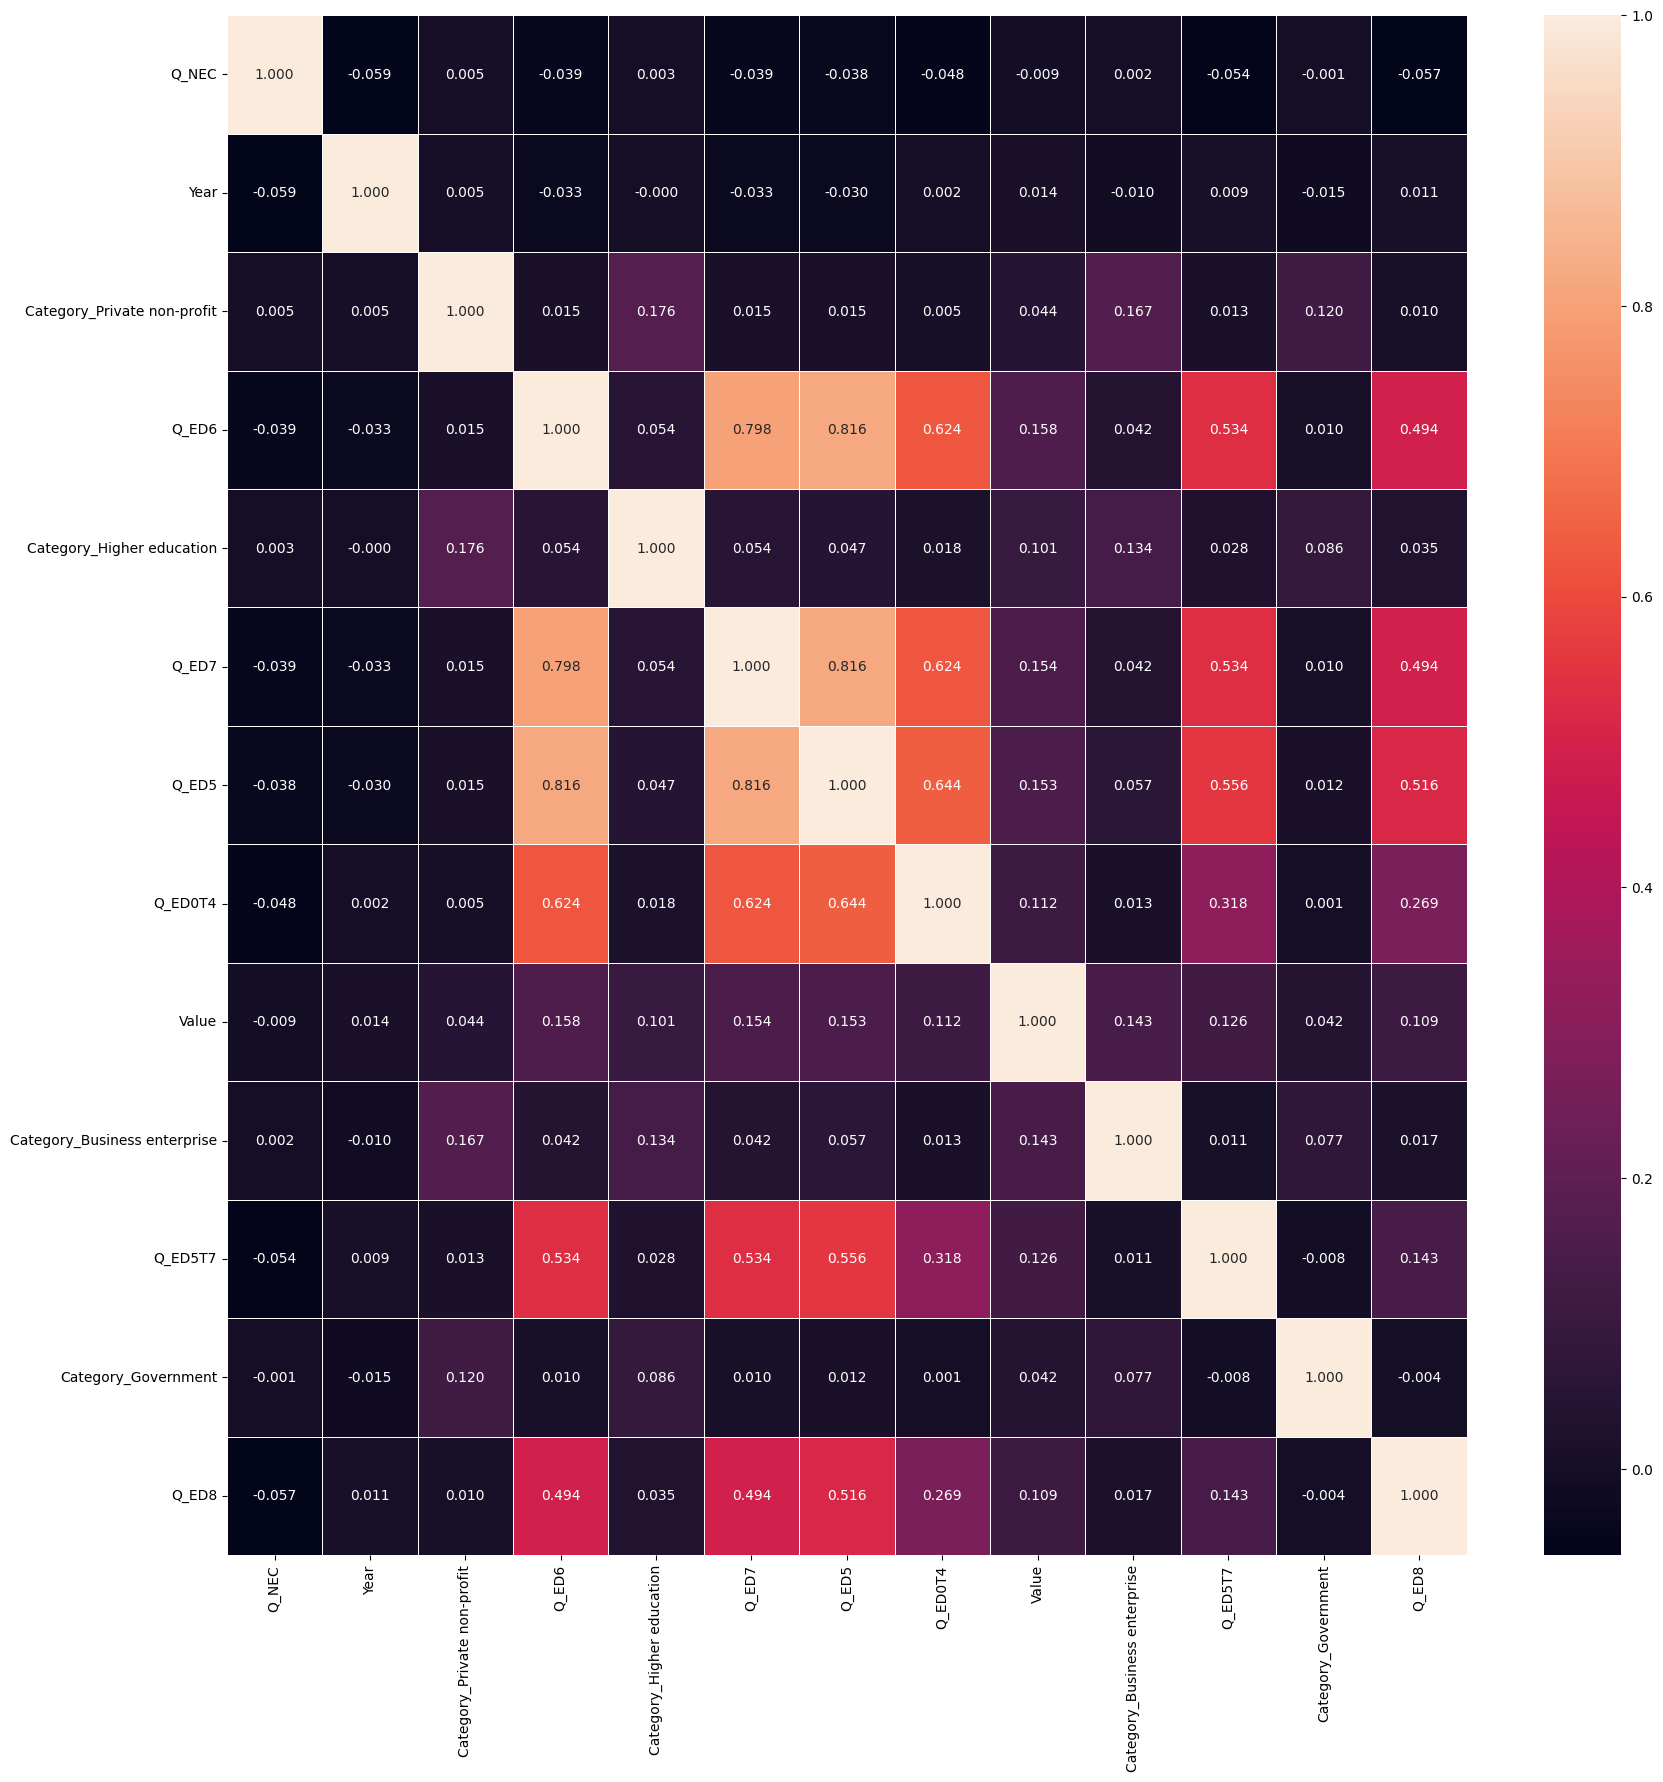

In [40]:
corr_matrix_feature_list = (set(filtered_df.columns))
corr_matrix_feature_list = list(corr_matrix_feature_list)
corr_matrix = filtered_df[corr_matrix_feature_list].corr()
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, linewidths = .5, fmt = '.3f', ax = ax)
plt.show()

In [41]:
filtered_df['Value'].fillna(filtered_df['Value'].mean(), inplace=True)

# Aggregate data by 'Country' and 'Sector of employment' and calculate mean
aggregated_data = filtered_df.groupby(['Country'])['Value'].mean().reset_index()
aggregated_data

<ipython-input-41-686952d5994c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Value'].fillna(filtered_df['Value'].mean(), inplace=True)


,Country,Value
0,Austria,1.197623e+04
1,Belgium,9.785154e+03
2,China,1.486131e+06
3,Czech Republic,1.182203e+04
4,France,7.991204e+04
5,Israel,3.727342e+04
6,Italy,3.986028e+04
7,Japan,1.691799e+05
8,Norway,1.749636e+04
9,Poland,2.534054e+04


In [42]:
aggregated_data = aggregated_data.rename(columns={'Value': 'Personel_RnD'})

# dataset 2💟

In [43]:
ppa = pd.read_csv('/content/drive/MyDrive/GBARD_NABS2007_13122023022043470.csv')
ppa.head()

,COUNTRY,Country,SEO,Socio economic objective,MEASURE,Measure,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,_T,Total,MIO_NAC,National Currency,2014,2014,AUD,Australian Dollar,6,Millions,NaN,NaN,7029.235,D,Difference in methodology
1,AUS,Australia,_T,Total,MIO_NAC,National Currency,2015,2015,AUD,Australian Dollar,6,Millions,NaN,NaN,6794.495,D,Difference in methodology
2,AUS,Australia,_T,Total,MIO_NAC,National Currency,2016,2016,AUD,Australian Dollar,6,Millions,NaN,NaN,6909.377,D,Difference in methodology
3,AUS,Australia,_T,Total,MIO_NAC,National Currency,2017,2017,AUD,Australian Dollar,6,Millions,NaN,NaN,7781.864,D,Difference in methodology
4,AUS,Australia,_T,Total,MIO_NAC,National Currency,2018,2018,AUD,Australian Dollar,6,Millions,NaN,NaN,7530.149,D,Difference in methodology


In [44]:
ppa.replace("Chinese Taipei", 'China', inplace=True)
ppa.replace('Czechia', 'Czech Republic', inplace=True)
ppa.replace('Korea', 'South Korea', inplace=True)
ppa.replace('Türkiye', 'Turkey', inplace=True)

In [45]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([ppa['Country']]).unique()),
})
zx

,abrive
0,Australia
1,Austria
2,Belgium
3,Canada
4,Chile
5,China
6,Colombia
7,Czech Republic
8,Denmark
9,Estonia


In [46]:
ppa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20155 entries, 0 to 20154
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY                   20155 non-null  object 
 1   Country                   20155 non-null  object 
 2   SEO                       20155 non-null  object 
 3   Socio economic objective  20155 non-null  object 
 4   MEASURE                   20155 non-null  object 
 5   Measure                   20155 non-null  object 
 6   YEAR                      20155 non-null  int64  
 7   Year                      20155 non-null  int64  
 8   Unit Code                 19819 non-null  object 
 9   Unit                      19819 non-null  object 
 10  PowerCode Code            20155 non-null  int64  
 11  PowerCode                 20155 non-null  object 
 12  Reference Period Code     6561 non-null   float64
 13  Reference Period          6561 non-null   float64
 14  Value 

I have no words, only emotions

So, lets analize our data and reduce it

In [47]:
zx = pd.DataFrame({
    'abrive': pd.concat([ppa['COUNTRY']]).unique(),
    'full': pd.concat([ppa['Country']]).unique()
})
zx.head()

,abrive,full
0,AUS,Australia
1,AUT,Austria
2,BEL,Belgium
3,CAN,Canada
4,CZE,Czech Republic


In [48]:
del ppa['COUNTRY']

In [49]:
zx = pd.DataFrame({
    'abrive': pd.concat([ppa['SEO']]).unique(),
    'full': pd.concat([ppa['Socio economic objective']]).unique()
})
zx

,abrive,full
0,_T,Total
1,NABS01,Exploration and exploitation of the Earth
2,NABS02,Environment
3,NABS03,Exploration and exploitation of space
4,NABS04,"Transport, telecommunication and other infrast..."
5,NABS05,Energy
6,NABS06,Industrial production and technology
7,NABS07,Health
8,NABS08,Agriculture
9,NABS09,Education


In [50]:
del ppa['Socio economic objective']

In [51]:
zx = pd.DataFrame({
    'abrive': pd.concat([ppa['MEASURE']]).unique(),
    'full': pd.concat([ppa['Measure']]).unique()
})
zx

,abrive,full
0,MIO_NAC,National Currency
1,DF6,2015 Dollars - Constant prices and PPPs
2,DC6,PPP Dollars - Current prices


In [52]:
del ppa['Measure']
del ppa['MEASURE']

In [53]:
del ppa['YEAR']

In [54]:
zx = pd.DataFrame({
    'abrive': pd.concat([ppa['Unit Code']]).unique(),
    'full': pd.concat([ppa['Unit']]).unique()
})
zx

,abrive,full
0,AUD,Australian Dollar
1,USD,US Dollar
2,EUR,Euro
3,CAD,Canadian Dollar
4,CZK,Czech Koruna
5,DKK,Danish Krone
6,HUF,Forint
7,ISK,Iceland Krona
8,JPY,Yen
9,KRW,Won


In [55]:
del ppa['Unit']

In [56]:
ppa[ppa['Unit Code'].isna()]

,Country,SEO,Year,Unit Code,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
19507,Colombia,NABS12,2014,NaN,0,Units,NaN,NaN,0.000,NaN,NaN
19508,Colombia,NABS12,2015,NaN,0,Units,NaN,NaN,0.000,NaN,NaN
19509,Colombia,NABS12,2016,NaN,0,Units,NaN,NaN,0.000,NaN,NaN
19510,Colombia,NABS12,2017,NaN,0,Units,NaN,NaN,0.000,NaN,NaN
19511,Colombia,NABS12,2018,NaN,0,Units,NaN,NaN,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19838,Colombia,NABS06,2016,NaN,0,Units,NaN,NaN,44968.567,NaN,NaN
19839,Colombia,NABS06,2017,NaN,0,Units,NaN,NaN,50652.280,NaN,NaN
19840,Colombia,NABS06,2018,NaN,0,Units,NaN,NaN,105548.208,NaN,NaN
19841,Colombia,NABS06,2019,NaN,0,Units,NaN,NaN,78005.594,NaN,NaN


In [57]:
exchange_rates = {
    'AUD': 0.75,
    'USD': 1.0,
    'EUR': 1.12,
    'CAD': 0.78,
    'CZK': 0.045,
    'DKK': 0.16,
    'HUF': 0.0032,
    'ISK': 0.0078,
    'JPY': 0.0091,
    'KRW': 0.00087,
    'MXN': 0.049,
    'NZD': 0.71,
    'NOK': 0.11,
    'PLN': 0.26,
    'SEK': 0.11,
    'CHF': 1.08,
    'TRY': 0.11,
    'GBP': 1.34,
    'CLP': 0.0013,
    'ILS': 0.31,
    'RON': 0.24,
    'RUB': 0.014,
    'TWD': 0.035,
}
ppa['Unit Code'].fillna('USD', inplace=True)

In [58]:
ppa['Value_in_USD'] = ppa.apply(lambda row: row['Value'] * exchange_rates[row['Unit Code']], axis=1)
ppa

,Country,SEO,Year,Unit Code,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags,Value_in_USD
0,Australia,_T,2014,AUD,6,Millions,NaN,NaN,7029.235,D,Difference in methodology,5271.92625
1,Australia,_T,2015,AUD,6,Millions,NaN,NaN,6794.495,D,Difference in methodology,5095.87125
2,Australia,_T,2016,AUD,6,Millions,NaN,NaN,6909.377,D,Difference in methodology,5182.03275
3,Australia,_T,2017,AUD,6,Millions,NaN,NaN,7781.864,D,Difference in methodology,5836.39800
4,Australia,_T,2018,AUD,6,Millions,NaN,NaN,7530.149,D,Difference in methodology,5647.61175
...,...,...,...,...,...,...,...,...,...,...,...,...
20150,Norway,NABS122,2022,NOK,6,Millions,NaN,NaN,1972.571,NaN,NaN,216.98281
20151,Norway,NABS122,2023,NOK,6,Millions,NaN,NaN,2033.451,P,Provisional value,223.67961
20152,Norway,NABS125,2022,NOK,6,Millions,NaN,NaN,5072.723,NaN,NaN,557.99953
20153,Norway,NABS125,2023,NOK,6,Millions,NaN,NaN,5242.840,P,Provisional value,576.71240


In [59]:
zx = pd.DataFrame({
    #'abrive': pd.concat([ppa['PowerCode Code']]).unique(),
    'full': pd.concat([ppa['PowerCode']]).unique()
})
zx

,full
0,Millions
1,Units


In [60]:
del ppa['PowerCode Code']

In [61]:
zx = pd.DataFrame({
    'abrive': pd.concat([ppa['Reference Period Code']]).unique(),
    'full': pd.concat([ppa['Reference Period']]).unique()
})
zx

,abrive,full
0,NaN,NaN
1,2015.0,2015.0


whyyyyyyy?
it have no practical sense because we chose current period

In [62]:
del ppa['Reference Period Code']
del ppa['Reference Period']

In [63]:
zx = pd.DataFrame({
    #'abrive': pd.concat([ppa['Flag Codes']]).unique(),
    'full': pd.concat([ppa['Flags']]).unique()
})
zx.head()

,full
0,Difference in methodology
1,Difference in methodology; Provisional value
2,Provisional value
3,NaN
4,Estimated value


In [64]:
del ppa['Flag Codes']

In [65]:
ppa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20155 entries, 0 to 20154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       20155 non-null  object 
 1   SEO           20155 non-null  object 
 2   Year          20155 non-null  int64  
 3   Unit Code     20155 non-null  object 
 4   PowerCode     20155 non-null  object 
 5   Value         19962 non-null  float64
 6   Flags         5476 non-null   object 
 7   Value_in_USD  19962 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


okey, we have no currancy fill it with moda

and we make dummies/categorical columns from flags?


In [66]:
filtered_df1 = ppa[ppa['Country'].isin(countriess)]
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([filtered_df1['Country']]).unique()),
})
zx

,abrive
0,Australia
1,Austria
2,Belgium
3,Canada
4,China
5,Czech Republic
6,Denmark
7,France
8,Germany
9,Israel


In [67]:
print('Data shape:', filtered_df1.shape)

# Do we have duplicates?
print('Number of Duplicates:', len(filtered_df1[filtered_df1.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', filtered_df1.isnull().sum().sum())

Data shape: (10210, 8)
Number of Duplicates: 568
Number of Missing Values: 6874


In [68]:
filtered_df1=filtered_df1.drop_duplicates()
filtered_df1

,Country,SEO,Year,Unit Code,PowerCode,Value,Flags,Value_in_USD
0,Australia,_T,2014,AUD,Millions,7029.235,Difference in methodology,5271.92625
1,Australia,_T,2015,AUD,Millions,6794.495,Difference in methodology,5095.87125
2,Australia,_T,2016,AUD,Millions,6909.377,Difference in methodology,5182.03275
3,Australia,_T,2017,AUD,Millions,7781.864,Difference in methodology,5836.39800
4,Australia,_T,2018,AUD,Millions,7530.149,Difference in methodology,5647.61175
...,...,...,...,...,...,...,...,...
20150,Norway,NABS122,2022,NOK,Millions,1972.571,NaN,216.98281
20151,Norway,NABS122,2023,NOK,Millions,2033.451,Provisional value,223.67961
20152,Norway,NABS125,2022,NOK,Millions,5072.723,NaN,557.99953
20153,Norway,NABS125,2023,NOK,Millions,5242.840,Provisional value,576.71240


In [69]:
df_dummies = filtered_df1['Flags'].str.get_dummies('; ').add_prefix('as_')

filtered_df1 = pd.concat([filtered_df1, df_dummies], axis=1)
filtered_df1

,Country,SEO,Year,Unit Code,PowerCode,Value,Flags,Value_in_USD,as_Break,as_Data included in another category,as_Difference in methodology,as_Estimated value,as_Includes data from another category,as_Provisional value,as_Underestimated or based on underestimated data,as_Unrevised breakdown not adding to the revised total
0,Australia,_T,2014,AUD,Millions,7029.235,Difference in methodology,5271.92625,0,0,1,0,0,0,0,0
1,Australia,_T,2015,AUD,Millions,6794.495,Difference in methodology,5095.87125,0,0,1,0,0,0,0,0
2,Australia,_T,2016,AUD,Millions,6909.377,Difference in methodology,5182.03275,0,0,1,0,0,0,0,0
3,Australia,_T,2017,AUD,Millions,7781.864,Difference in methodology,5836.39800,0,0,1,0,0,0,0,0
4,Australia,_T,2018,AUD,Millions,7530.149,Difference in methodology,5647.61175,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,Norway,NABS122,2022,NOK,Millions,1972.571,NaN,216.98281,0,0,0,0,0,0,0,0
20151,Norway,NABS122,2023,NOK,Millions,2033.451,Provisional value,223.67961,0,0,0,0,0,1,0,0
20152,Norway,NABS125,2022,NOK,Millions,5072.723,NaN,557.99953,0,0,0,0,0,0,0,0
20153,Norway,NABS125,2023,NOK,Millions,5242.840,Provisional value,576.71240,0,0,0,0,0,1,0,0


In [70]:
del filtered_df1['Flags']
del filtered_df1['Unit Code']

In [71]:
df_dummies = pd.get_dummies(filtered_df1['PowerCode'], prefix='pow')
filtered_df1 = pd.concat([filtered_df1, df_dummies], axis=1)
filtered_df1

,Country,SEO,Year,PowerCode,Value,Value_in_USD,as_Break,as_Data included in another category,as_Difference in methodology,as_Estimated value,as_Includes data from another category,as_Provisional value,as_Underestimated or based on underestimated data,as_Unrevised breakdown not adding to the revised total,pow_Millions
0,Australia,_T,2014,Millions,7029.235,5271.92625,0,0,1,0,0,0,0,0,1
1,Australia,_T,2015,Millions,6794.495,5095.87125,0,0,1,0,0,0,0,0,1
2,Australia,_T,2016,Millions,6909.377,5182.03275,0,0,1,0,0,0,0,0,1
3,Australia,_T,2017,Millions,7781.864,5836.39800,0,0,1,0,0,0,0,0,1
4,Australia,_T,2018,Millions,7530.149,5647.61175,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20150,Norway,NABS122,2022,Millions,1972.571,216.98281,0,0,0,0,0,0,0,0,1
20151,Norway,NABS122,2023,Millions,2033.451,223.67961,0,0,0,0,0,1,0,0,1
20152,Norway,NABS125,2022,Millions,5072.723,557.99953,0,0,0,0,0,0,0,0,1
20153,Norway,NABS125,2023,Millions,5242.840,576.71240,0,0,0,0,0,1,0,0,1


In [72]:
del filtered_df1['PowerCode']
del filtered_df1['pow_Millions']

In [73]:
del filtered_df1['Value']

In [74]:
#cooo = pd.get_dummies(filtered_df1['SEO'], prefix='c')

#filtered_df1 = pd.concat([filtered_df1, cooo], axis=1)
#li = ['c__T_XGUF', 'c__T','c_NABS14','c_NABS136', 'c_NABS135', 'c_NABS134', 'c_NABS133', 'c_NABS131', 'c_NABS126', 'c_NABS125', 'c_NABS124', 'c_NABS123', 'c_NABS121', 'c_NABS11', 'c_NABS10', ]
#for l in li:
 # del filtered_df1[l]
del filtered_df1['SEO']

<ipython-input-75-c49c73633f9a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_df1[corr_matrix_feature_list].corr()


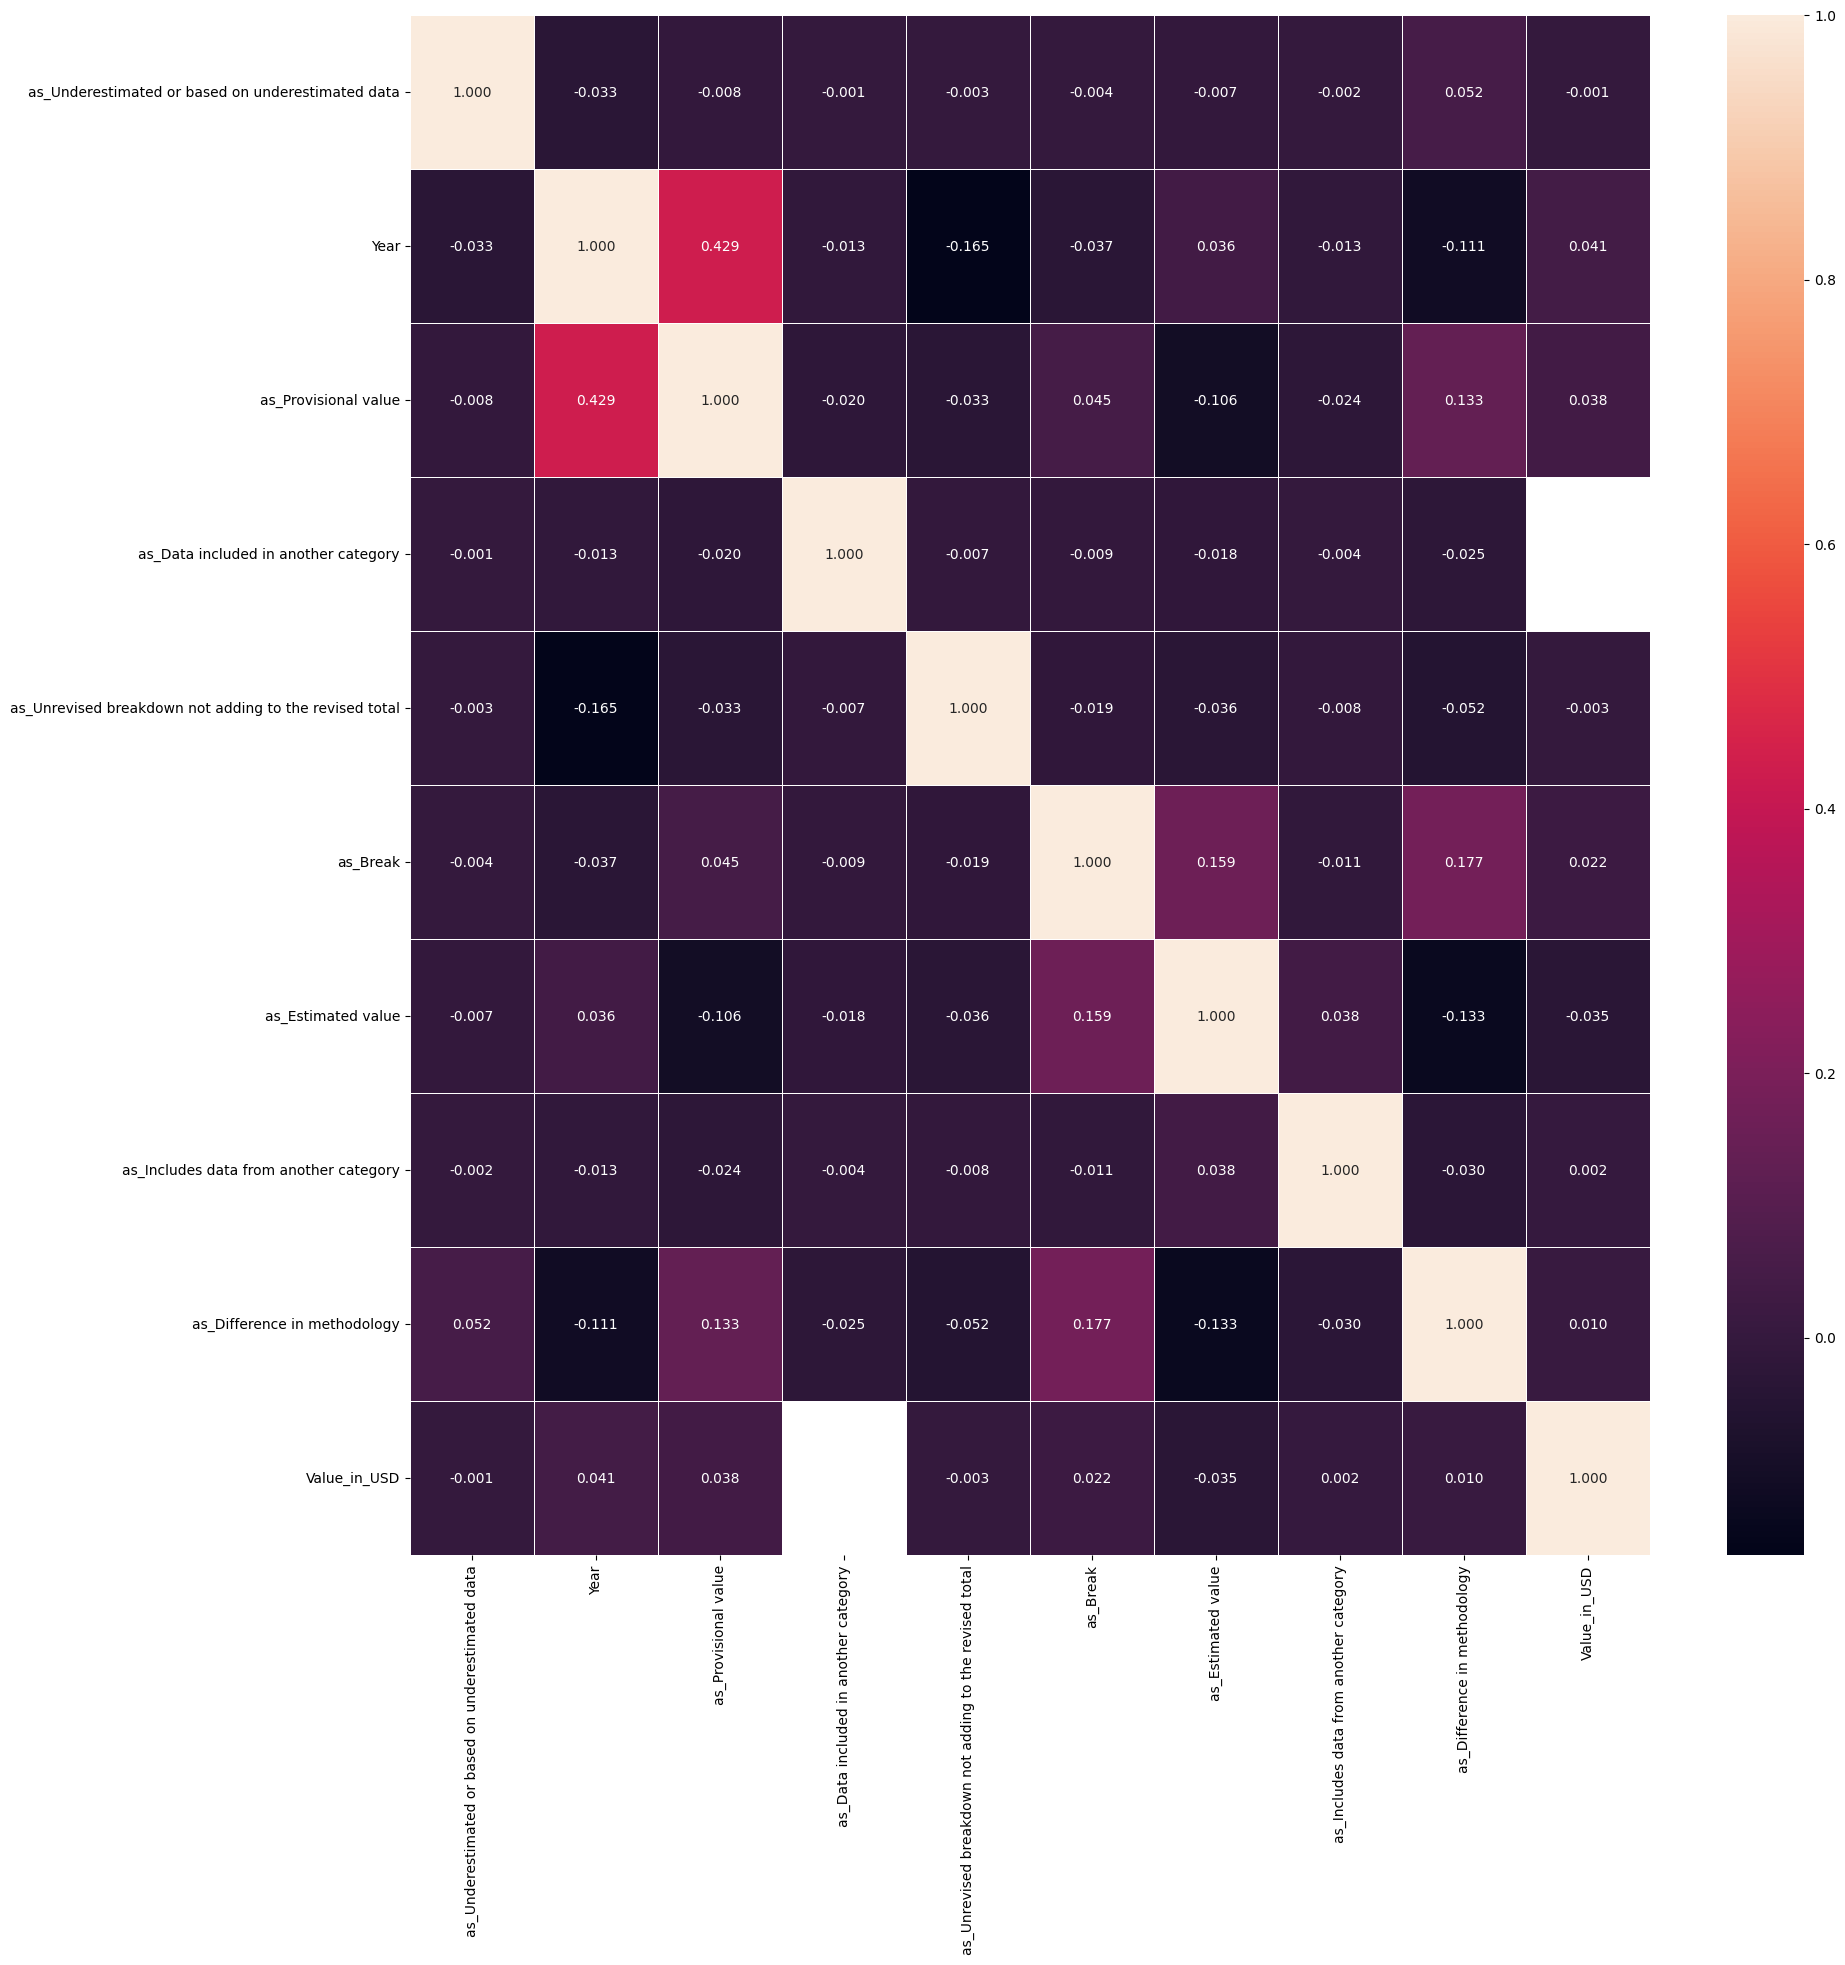

In [75]:
corr_matrix_feature_list = (set(filtered_df1.columns))
corr_matrix_feature_list = list(corr_matrix_feature_list)
corr_matrix = filtered_df1[corr_matrix_feature_list].corr()
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr_matrix, annot = True, linewidths = .5, fmt = '.3f', ax = ax)
plt.show()

In [76]:
filtered_df1['Value_in_USD'].fillna(filtered_df1['Value_in_USD'].mean(), inplace=True)

# Aggregate data by 'Country' and 'Sector of employment' and calculate mean
aggregated_data1 = filtered_df1.groupby(['Country'])['Value_in_USD'].mean().reset_index()
aggregated_data1

,Country,Value_in_USD
0,Australia,711.794681
1,Austria,371.765493
2,Belgium,497.739784
3,Canada,2383.369664
4,China,566.228943
5,Czech Republic,205.366998
6,Denmark,408.241115
7,France,1803.247329
8,Germany,3831.160019
9,Israel,318.023330


In [77]:
aggregated_data1 = aggregated_data1.rename(columns={'Value': 'Budget_for_RnD'})

# part 3 🐦

what is this file about

In [78]:
popa = pd.read_csv('/content/drive/MyDrive/UNdata_Export_20231213_022358562.csv')
popa.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Albania,2008,All genders,Not applicable,Number,2892.0
1,Algeria,2005,All genders,Not applicable,Number,16895.0
2,American Samoa,2005,All genders,Not applicable,Number,7.0
3,American Samoa,2004,All genders,Not applicable,Number,10.0
4,American Samoa,2003,All genders,Not applicable,Number,24.0


In [79]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([popa['Reference Area']]).unique()),
})
zx

,abrive
0,Albania
1,Algeria
2,American Samoa
3,Angola
4,Argentina
...,...
134,Uruguay
135,Uzbekistan
136,Viet Nam
137,Zambia


In [80]:
popa.replace('United States Virgin Islands', 'United States', inplace=True)
popa.replace('Republic of Korea', 'South Korea', inplace=True)
popa.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

In [81]:
filtered_df2 = popa[popa['Reference Area'].isin(countriess)]
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([filtered_df2['Reference Area']]).unique()),
})
zx

,abrive
0,Austria
1,Belgium
2,Brazil
3,China
4,Czech Republic
5,Denmark
6,France
7,Germany
8,Italy
9,Japan


I'm in love ♥

In [82]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 42 to 1209
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reference Area        266 non-null    object 
 1   Time Period           266 non-null    int64  
 2   Sex                   266 non-null    object 
 3   Age group             266 non-null    object 
 4   Units of measurement  266 non-null    object 
 5   Observation Value     266 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.5+ KB


In [83]:
zx = pd.DataFrame({
    'a': pd.concat([filtered_df2['Sex']]).unique(),
})
zx

,a
0,All genders


In [84]:
del filtered_df2['Sex']

In [85]:
zx = pd.DataFrame({
    'a': pd.concat([filtered_df2['Age group']]).unique(),
})
zx

,a
0,Not applicable


In [86]:
del filtered_df2['Age group']

In [87]:
zx = pd.DataFrame({
    'a': pd.concat([filtered_df2['Units of measurement']]).unique(),
})
zx

,a
0,Number


In [88]:
del filtered_df2['Units of measurement']

In [89]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 42 to 1209
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference Area     266 non-null    object 
 1   Time Period        266 non-null    int64  
 2   Observation Value  266 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.3+ KB


normilize data and OK

In [90]:
zx = pd.DataFrame({
    'a': pd.concat([filtered_df2['Time Period']]).unique(),
})
zx

,a
0,2013
1,2011
2,2009
3,2007
4,2006
5,2004
6,2002
7,1998
8,2010
9,2008


In [91]:
filtered_df2 = filtered_df2[filtered_df2['Time Period']>2008]

In [92]:
filtered_df2['Observation Value'].fillna(filtered_df2['Observation Value'].mean(), inplace=True)

# Aggregate data by 'Country' and 'Sector of employment' and calculate mean
aggregated_data2 = filtered_df2.groupby(['Reference Area'])['Observation Value'].mean().reset_index()
aggregated_data2

<ipython-input-92-18ac0c23d66f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Observation Value'].fillna(filtered_df2['Observation Value'].mean(), inplace=True)


,Reference Area,Observation Value
0,Austria,1.071647e+05
1,Belgium,9.310493e+04
2,Brazil,4.486005e+05
3,China,4.288386e+06
4,Czech Republic,8.324315e+04
5,Denmark,8.482952e+04
6,France,5.372431e+05
7,Germany,8.244323e+05
8,Italy,3.572984e+05
9,Japan,1.153270e+06


In [93]:
aggregated_data2 = aggregated_data2.rename(columns={'Value': 'quan_of_RnD_ppl'})

In [94]:
aggregated_data2 = aggregated_data2.rename(columns={'Reference Area': 'Country'})

# NO WAY TO STOP (part 4) 💪

Researchers by Sector: Higher education sector

In [95]:
p = pd.read_csv('/content/drive/MyDrive/UNdata_Export_20231213_024616404.csv')
p.head()

,Reference Area,Time Period,Observation Value
0,Albania,2008,1345.0
1,Algeria,2005,13075.0
2,American Samoa,2005,7.0
3,American Samoa,2004,10.0
4,American Samoa,2003,24.0


In [96]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([p['Reference Area']]).unique()),
})
zx

,abrive
0,Albania
1,Algeria
2,American Samoa
3,Angola
4,Argentina
...,...
131,Uzbekistan
132,Venezuela (Bolivarian Republic of)
133,Viet Nam
134,Zambia


In [97]:
p.replace('United States Virgin Islands', 'United States', inplace=True)
p.replace('Republic of Korea', 'South Korea', inplace=True)
p.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

In [98]:
p = p[p['Reference Area'].isin(countriess)]
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([p['Reference Area']]).unique()),
})
zx

,abrive
0,Austria
1,Belgium
2,Brazil
3,China
4,Czech Republic
5,Denmark
6,France
7,Germany
8,Italy
9,Japan


In [99]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 32 to 963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference Area     263 non-null    object 
 1   Time Period        263 non-null    int64  
 2   Observation Value  263 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2+ KB


In [100]:
zx = pd.DataFrame({
    'a': pd.concat([p['Time Period']]).unique(),
})
zx

,a
0,2013
1,2011
2,2009
3,2007
4,2006
5,2004
6,2002
7,1998
8,2012
9,2010


In [101]:
p = p[p['Time Period']>2008]

In [102]:
p['Observation Value'].fillna(p['Observation Value'].mean(), inplace=True)

# Aggregate data by 'Country' and 'Sector of employment' and calculate mean
aggregated_data3 = p.groupby(['Reference Area'])['Observation Value'].mean().reset_index()
aggregated_data3

<ipython-input-102-18ad2294c454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['Observation Value'].fillna(p['Observation Value'].mean(), inplace=True)


,Reference Area,Observation Value
0,Austria,31609.333333
1,Belgium,31156.400000
2,Brazil,178588.500000
3,China,515843.666667
4,Czech Republic,20843.800000
5,Denmark,25139.900000
6,France,109835.218200
7,Germany,241003.801800
8,Italy,76383.000000
9,Japan,314911.833333


In [103]:
aggregated_data3 = aggregated_data3.rename(columns={'Value': 'higher'})

In [104]:
aggregated_data3 = aggregated_data3.rename(columns={'Reference Area': 'Country'})

# datasets from 5 group 🐕

Researchers by Sector: Private non-profit sector (HC)

In [105]:
s = pd.read_csv('/content/drive/MyDrive/UNdata_Export_20231213_025209378.csv')
s.head()

,Reference Area,Time Period,Observation Value
0,Argentina,2014,816.0
1,Argentina,2013,902.0
2,Argentina,2012,1082.0
3,Argentina,2011,1080.0
4,Argentina,2010,1098.0


In [106]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference Area     628 non-null    object 
 1   Time Period        628 non-null    int64  
 2   Observation Value  628 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.8+ KB


In [107]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([s['Reference Area']]).unique()),
})
zx

,abrive
0,Argentina
1,Austria
2,Azerbaijan
3,Bahrain
4,Belarus
...,...
87,Uruguay
88,Uzbekistan
89,Venezuela (Bolivarian Republic of)
90,Viet Nam


In [108]:
s.replace('Macao Special Administrative Region of China', 'China', inplace=True)
s.replace('Hong Kong Special Administrative Region of China', 'China', inplace=True)
s.replace('Republic of Korea', 'South Korea', inplace=True)
s.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

In [109]:
s = s[s['Reference Area'].isin(countriess)]
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([s['Reference Area']]).unique()),
})
zx

,abrive
0,Austria
1,Belgium
2,Brazil
3,China
4,Czech Republic
5,Denmark
6,France
7,Italy
8,Japan
9,Netherlands


In [110]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 18 to 595
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference Area     196 non-null    object 
 1   Time Period        196 non-null    int64  
 2   Observation Value  196 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.1+ KB


In [111]:
s = s[s['Time Period']>2008]
s['Observation Value'].fillna(s['Observation Value'].mean(), inplace=True)

# Aggregate data by 'Country' and 'Sector of employment' and calculate mean
aggregated_data4 = s.groupby(['Reference Area'])['Observation Value'].mean().reset_index()
aggregated_data4

<ipython-input-111-ac7f22d90533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Observation Value'].fillna(s['Observation Value'].mean(), inplace=True)


,Reference Area,Observation Value
0,Austria,519.0000
1,Belgium,273.2000
2,Brazil,1002.0000
3,China,17.0000
4,Czech Republic,222.4700
5,Denmark,250.0000
6,France,4013.2000
7,Italy,5659.5000
8,Japan,9299.5000
9,Poland,108.6000


In [112]:
aggregated_data4 = aggregated_data4.rename(columns={'Value': 'quan_of_private'})

In [113]:
aggregated_data4 = aggregated_data4.rename(columns={'Reference Area': 'Country'})


# part 6 (3 in 1) 🧁

In [114]:
df1 = pd.read_csv('/content/drive/MyDrive/euroSciVoc.csv', delimiter=';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120172 entries, 0 to 120171
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   projectID              120172 non-null  int64  
 1   euroSciVocCode         120172 non-null  object 
 2   euroSciVocPath         112501 non-null  object 
 3   euroSciVocTitle        116687 non-null  object 
 4   euroSciVocDescription  0 non-null       float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB




```
безполєзна штука😞
```



In [115]:
df2 = pd.read_csv('/content/drive/MyDrive/legalBasis.csv', delimiter=';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65825 entries, 0 to 65824
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   projectID            65825 non-null  int64 
 1   legalBasis           65825 non-null  object
 2   title                65825 non-null  object
 3   uniqueProgrammePart  35375 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB




```
мені також плювати на цю інфу
```



In [116]:
df3 = pd.read_csv('/content/drive/MyDrive/organization.csv', delimiter=';')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178311 entries, 0 to 178310
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   projectID           178311 non-null  int64  
 1   projectAcronym      178311 non-null  object 
 2   organisationID      178311 non-null  int64  
 3   vatNumber           157143 non-null  object 
 4   name                178311 non-null  object 
 5   shortName           139400 non-null  object 
 6   SME                 177787 non-null  object 
 7   activityType        178310 non-null  object 
 8   street              177088 non-null  object 
 9   postCode            176288 non-null  object 
 10  city                177783 non-null  object 
 11  country             178220 non-null  object 
 12  nutsCode            0 non-null       float64
 13  geolocation         178091 non-null  object 
 14  organizationURL     115935 non-null  object 
 15  contactForm         178311 non-nul

In [117]:
zx = pd.DataFrame({
    'abrive': df3['country'].unique()
})
zx

,abrive
0,EE
1,LT
2,CZ
3,CY
4,PL
...,...
174,DJ
175,YE
176,KW
177,BQ


In [118]:
data = {
    'Code': ['AF', 'AX', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW', 'AU', 'AT', 'AZ', 'BS', 'BH',
             'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BV', 'BR', 'IO', 'BN', 'BG', 'BF',
             'BI', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'TD', 'CL', 'CN', 'CX', 'CC', 'CO', 'KM', 'CG', 'CD', 'CK', 'CR',
             'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'ET', 'FK',
             'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'TF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU',
             'GT', 'GG', 'GN', 'GW', 'GY', 'HT', 'HM', 'VA', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
             'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'KP', 'KR', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS',
             'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MK', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT',
             'MX', 'FM', 'MD', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', 'NA', 'NR', 'NP', 'NL', 'AN', 'NC', 'NZ', 'NI',
             'NE', 'NG', 'NU', 'NF', 'MP', 'NO', 'OM', 'PK', 'PW', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PN', 'PL', 'PT',
             'PR', 'QA', 'RS', 'RE', 'RO', 'RU', 'RW', 'BL', 'SH', 'KN', 'LC', 'MF', 'PM', 'VC', 'WS', 'SM', 'ST', 'SA',
             'SN', 'CS', 'SC', 'SL', 'SG', 'SX', 'SK', 'SI', 'SB', 'SO', 'ZA', 'GS', 'SS', 'ES', 'LK', 'SD', 'SR', 'SJ',
             'SZ', 'SE', 'CH', 'SY', 'TW', 'TJ', 'TZ', 'TH', 'TL', 'TG', 'TK', 'TO', 'TT', 'TN', 'TR', 'XT', 'TM', 'TC',
             'TV', 'UG', 'UA', 'AE', 'GB', 'US', 'UM', 'UY', 'UZ', 'VU', 'VE', 'VN', 'VG', 'VI', 'WF', 'EH', 'YE', 'ZM',
             'ZW'],
    'Country': ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
                'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
                'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
                'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil',
                'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
                'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China',
                'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of',
                'Cook Islands', 'Costa Rica', 'Cote d\'Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
                'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
                'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
                'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
                'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau',
                'Guyana', 'Haiti', 'Heard and Mc Donald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong',
                'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man',
                'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakstan', 'Kenya', 'Kiribati', 'Korea, Democratic People\'s Republic of',
                'Korea, Republic of', 'Kosovo (temporary code)', 'Kuwait', 'Kyrgyzstan', 'Lao, People\'s Democratic Republic', 'Latvia',
                'Lebanon', 'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
                'Macedonia, The Former Yugoslav Republic Of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
                'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of',
                'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
                'Nauru', 'Nepal', 'Netherlands', 'Netherlands Antilles', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
                'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied',
                'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
                'Republic of Serbia', 'Reunion', 'Romania', 'Russia Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena',
                'Saint Kitts & Nevis', 'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
                'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia and Montenegro', 'Seychelles', 'Sierra Leone',
                'Singapore', 'Sint Maarten', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia & The South Sandwich Islands',
                'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic',
                'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago',
                'Tunisia', 'Turkey', 'Turkish Rep N Cyprus (temporary code)', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
                'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands, British',
                'Virgin Islands, U.S.', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
}
da = pd.DataFrame(data)

In [119]:
daa = dict(zip(da['Code'], da['Country']))

df3['Country'] = df3['country'].map(daa)
df3

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active,Country
0,810630,VALORTECH,999857280,EE100018015,EESTI MAAULIKOOL,ESTONIAN UNIVERSITY OF LIFE SCIENCES EMU,False,HES,KREUTZWALDI 1,51014,...,2023-05-13 18:49:37,1907871,1,coordinator,2498625.0,2498625.0,2498625,False,NaN,Estonia
1,810961,CUDAN,999421653,EE100251335,TALLINN UNIVERSITY,NaN,False,HES,Narva Road 25,10120,...,2023-02-26 20:13:57,1918216,1,coordinator,2500000.0,2500000.0,2500000,False,NaN,Estonia
2,810318,IN4ACT,999844961,LT119505811,KAUNO TECHNOLOGIJOS UNIVERSITETAS,"UNIVERSITY OF TECHNOLOGY, KAUNAS",False,HES,K DONELAICIO 73,LT-44029,...,2023-03-27 15:39:30,1905944,1,coordinator,2487667.5,2487667.5,"2487667,5",False,NaN,Lithuania
3,810310,J. Heyrovsky Chair,999511863,CZ61388955,"USTAV FYZIKALNI CHEMIE J. HEYROVSKEHO AV CR, v...",HIPC,False,OTH,DOLEJSKOVA 2155/3,182 23,...,2023-03-10 20:07:05,1914566,1,coordinator,2483750.0,2483750.0,"2485937,5",False,NaN,Czechia
4,810660,SimEA,965934440,CY10167225J,THE CYPRUS INSTITUTE,THE CYPRUS INSTITUTE,False,HES,CONSTANTINOU KAVAFI 20,2121,...,2022-08-19 15:46:19,1916865,1,coordinator,2499250.0,2499250.0,2499250,False,NaN,Cyprus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178306,814427,WIRE2018,998208086,ATU53064302,STANDORTAGENTUR TIROL GMBH,STANDORTAGENTUR TIROL GMBH,False,OTH,ING ETZEL STRASSE 17,6020,...,2022-08-12 17:16:10,2110828,1,coordinator,250000.0,250000.0,461125,False,NaN,Austria
178307,775987,IEM17,913554537,MT21085935,SPECIAL INTEREST TRAVEL LIMITED,SIT Ltd.,False,PRC,DEMAJO HOUSE 103 ARCHBISHOP STREET,1232,...,2022-08-05 20:54:17,2995063,1,coordinator,350000.0,350000.0,350000,False,NaN,Malta
178308,723988,FIE2016,925824164,DE301425922,THE EXTREMELY USEFUL COMPANY GMBH,TEUC,True,PRC,ODENWALDSTRASSE 8,64347,...,2022-08-11 19:18:40,2471058,1,coordinator,300000.0,300000.0,"313176,33",False,NaN,Germany
178309,681463,H2020,948759523,NaN,COST ASSOCIATION,CA,False,OTH,MANHATTAN CENTRE AVENUE DE BOULEVARD 21/2,1210,...,2022-08-15 14:46:07,2565914,1,coordinator,178169171.0,178169171.0,178169171,False,NaN,Belgium


In [120]:
zx = pd.DataFrame({
    'abrive': df3['Country'].unique()
})
zx

,abrive
0,Estonia
1,Lithuania
2,Czechia
3,Cyprus
4,Poland
...,...
171,Djibouti
172,Yemen
173,Kuwait
174,"Bonaire, Sint Eustatius and Saba"


In [121]:
df3.replace('Czechia', 'Czech Republic', inplace=True)
df3.replace('Hong Kong', 'China', inplace=True)
df3.replace('Korea, Republic of', 'South Korea', inplace=True)
df3.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom', inplace=True)

In [122]:
df3 = df3[df3['Country'].isin(countriess)]
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([df3['Country']]).unique()),
})
zx

,abrive
0,Australia
1,Austria
2,Belgium
3,Brazil
4,Canada
5,China
6,Czech Republic
7,Denmark
8,France
9,Germany


In [123]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119015 entries, 3 to 178309
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   projectID           119015 non-null  int64  
 1   projectAcronym      119015 non-null  object 
 2   organisationID      119015 non-null  int64  
 3   vatNumber           105420 non-null  object 
 4   name                119015 non-null  object 
 5   shortName           94496 non-null   object 
 6   SME                 118600 non-null  object 
 7   activityType        119015 non-null  object 
 8   street              118194 non-null  object 
 9   postCode            118035 non-null  object 
 10  city                118598 non-null  object 
 11  country             119015 non-null  object 
 12  nutsCode            0 non-null       float64
 13  geolocation         118860 non-null  object 
 14  organizationURL     77288 non-null   object 
 15  contactForm         119015 non-nul

In [124]:
del df3['projectAcronym']
del df3['name']
del df3['shortName']
del df3['street']
del df3['postCode']
del df3['city']
del df3['country']
del df3['geolocation']
del df3['organizationURL']
del df3['contactForm']
del df3['contentUpdateDate']

In [125]:
del df3['vatNumber']
del df3['nutsCode']
del df3['endOfParticipation']
del df3['active']

In [126]:
df3

,projectID,organisationID,SME,activityType,rcn,order,role,ecContribution,netEcContribution,totalCost,Country
3,810310,999511863,False,OTH,1914566,1,coordinator,2.483750e+06,2.483750e+06,"2485937,5",Czech Republic
5,810425,999452693,False,REC,1910109,1,coordinator,2.498888e+06,2.498888e+06,"2498887,5",Poland
8,664408,999981537,False,REC,1906447,4,participant,1.381250e+05,1.381250e+05,138125,Austria
12,664544,999987066,False,REC,1905669,2,participant,1.329388e+05,1.329388e+05,"132938,75",Netherlands
17,669062,998139604,False,REC,1911028,1,coordinator,2.449496e+06,2.449496e+06,"2721662,5",Poland
...,...,...,...,...,...,...,...,...,...,...,...
178304,861952,948759523,False,OTH,2565914,1,coordinator,8.184000e+07,8.184000e+07,81840000,Belgium
178305,832124,905746910,False,PRC,1955550,1,coordinator,3.499525e+05,3.499525e+05,"349952,5",Austria
178306,814427,998208086,False,OTH,2110828,1,coordinator,2.500000e+05,2.500000e+05,461125,Austria
178308,723988,925824164,True,PRC,2471058,1,coordinator,3.000000e+05,3.000000e+05,"313176,33",Germany


In [127]:
print(df3['totalCost'].dtypes)

object


In [128]:
def custom_converter(value):
    try:
        if isinstance(value, str):
            cleaned_value = value.replace(',', '').replace('.', '')
            cleaned_value = cleaned_value.rsplit('.', 1)[0] + '.' + cleaned_value.rsplit('.', 1)[-1]
            return float(cleaned_value)
        else:
            return float(value)
    except ValueError:
        return None


In [129]:
df3['totalCost'] = df3['totalCost'].apply(custom_converter)

aggregated_data5 = df3.groupby(['Country'])['totalCost'].agg(['sum', 'count']).reset_index()
aggregated_data5.columns = ['Country', 'Sum_totalCost', 'Count_totalCost']
aggregated_data5

<ipython-input-129-0d59e83fb021>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['totalCost'] = df3['totalCost'].apply(custom_converter)


,Country,Sum_totalCost,Count_totalCost
0,Australia,1.822284e+09,363
1,Austria,8.965424e+10,5093
2,Belgium,1.463607e+11,8462
3,Brazil,7.578801e+08,267
4,Canada,2.007757e+09,471
5,China,1.968458e+09,628
6,Czech Republic,4.343571e+10,1896
7,Denmark,6.381570e+10,3981
8,France,1.160350e+12,17197
9,Germany,8.701159e+11,20805


In [130]:
aggregated_data5['Sum_totalCost'] = aggregated_data5['Sum_totalCost']/aggregated_data5['Count_totalCost']
aggregated_data5

,Country,Sum_totalCost,Count_totalCost
0,Australia,5.020065e+06,363
1,Austria,1.760342e+07,5093
2,Belgium,1.729623e+07,8462
3,Brazil,2.838502e+06,267
4,Canada,4.262753e+06,471
5,China,3.134487e+06,628
6,Czech Republic,2.290913e+07,1896
7,Denmark,1.603007e+07,3981
8,France,6.747396e+07,17197
9,Germany,4.182244e+07,20805


In [131]:
del aggregated_data5['Count_totalCost']

In [132]:
aggregated_data5 = aggregated_data5.rename(columns={'aggregated_data5': 'budget_of_research'})

In [133]:
df4 = pd.read_csv('/content/drive/MyDrive/project.csv', delimiter=';')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35401 entries, 0 to 35400
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  35401 non-null  int64 
 1   acronym             35401 non-null  object
 2   status              35401 non-null  object
 3   title               35401 non-null  object
 4   startDate           35390 non-null  object
 5   endDate             35390 non-null  object
 6   totalCost           35401 non-null  object
 7   ecMaxContribution   35401 non-null  object
 8   legalBasis          35375 non-null  object
 9   topics              35401 non-null  object
 10  ecSignatureDate     35401 non-null  object
 11  frameworkProgramme  35401 non-null  object
 12  masterCall          35401 non-null  object
 13  subCall             35401 non-null  object
 14  fundingScheme       35399 non-null  object
 15  nature              595 non-null    object
 16  objective           35

In [134]:
df5 = pd.read_csv('/content/drive/MyDrive/projectDeliverables.csv', delimiter=';')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152905 entries, 0 to 152904
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 152905 non-null  object
 1   title              152904 non-null  object
 2   deliverableType    148541 non-null  object
 3   description        151766 non-null  object
 4   projectID          152905 non-null  int64 
 5   projectAcronym     152905 non-null  object
 6   url                152905 non-null  object
 7   collection         148541 non-null  object
 8   contentUpdateDate  152905 non-null  object
 9   rcn                152905 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 11.7+ MB


In [135]:
df6 = pd.read_csv('/content/drive/MyDrive/projectIrps_h2020.csv', delimiter=',')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   projectID               2324 non-null   int64  
 1   type                    2324 non-null   object 
 2   title                   2324 non-null   object 
 3   organisationID          2323 non-null   float64
 4   applicantName           2324 non-null   object 
 5   applicationDate         2321 non-null   object 
 6   applicationPrefix       2324 non-null   object 
 7   applicationIdentifier   2324 non-null   object 
 8   applicationKind         2324 non-null   object 
 9   epoAppUrl               2324 non-null   object 
 10  priorityDate            1688 non-null   object 
 11  patentType              2323 non-null   object 
 12  awardDate               2324 non-null   object 
 13  awardPrefix             2324 non-null   object 
 14  awardIdentifier         2324 non-null   

In [136]:
df7 = pd.read_csv('/content/drive/MyDrive/projectPublications.csv', delimiter=';')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368010 entries, 0 to 368009
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 368010 non-null  object 
 1   title              368009 non-null  object 
 2   isPublishedAs      355315 non-null  object 
 3   authors            367998 non-null  object 
 4   journalTitle       340461 non-null  object 
 5   journalNumber      227615 non-null  object 
 6   publishedYear      367955 non-null  float64
 7   publishedPages     192532 non-null  object 
 8   issn               239010 non-null  object 
 9   isbn               40147 non-null   object 
 10  doi                293787 non-null  object 
 11  projectID          368010 non-null  int64  
 12  projectAcronym     368010 non-null  object 
 13  collection         355315 non-null  object 
 14  contentUpdateDate  368010 non-null  object 
 15  rcn                368010 non-null  int64  
dtypes:

In [137]:
df8 = pd.read_csv('/content/drive/MyDrive/reportSummaries.csv', delimiter=';')
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29694 entries, 0 to 29693
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 29694 non-null  object
 1   title              29694 non-null  object
 2   projectID          29694 non-null  int64 
 3   projectAcronym     29694 non-null  object
 4   attachment         24632 non-null  object
 5   contentUpdateDate  29694 non-null  object
 6   rcn                29694 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [138]:
df9 = pd.read_csv('/content/drive/MyDrive/topics.csv', delimiter=';')
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35401 entries, 0 to 35400
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   projectID  35401 non-null  int64 
 1   topic      35401 non-null  object
 2   title      35401 non-null  object
dtypes: int64(1), object(2)
memory usage: 829.8+ KB


In [139]:
df10 = pd.read_csv('/content/drive/MyDrive/webItem.csv', delimiter=';')
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   language            9 non-null      object
 1   availableLanguages  9 non-null      object
 2   uri                 9 non-null      object
 3   title               3 non-null      object
 4   type                9 non-null      object
 5   source              9 non-null      object
 6   represents          6 non-null      object
dtypes: object(7)
memory usage: 632.0+ bytes


In [140]:
df11 = pd.read_csv('/content/drive/MyDrive/webLink.csv', delimiter=';')
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182975 entries, 0 to 182974
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   projectID           182975 non-null  int64 
 1   physUrl             182974 non-null  object
 2   id                  182970 non-null  object
 3   availableLanguages  182975 non-null  object
 4   status              272 non-null     object
 5   archivedDate        272 non-null     object
 6   type                182975 non-null  object
 7   source              182974 non-null  object
 8   represents          29143 non-null   object
dtypes: int64(1), object(8)
memory usage: 12.6+ MB


# part 7🎆⌚❄

In [141]:
df = pd.read_excel(open('/content/drive/MyDrive/Data_Description.xlsx','rb'), sheet_name='Data')
df.head()

,authfull,inst_name,cntry,np6020,firstyr,lastyr,rank (ns),nc2020 (ns),h20 (ns),hm20 (ns),...,nc2020_d,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
0,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1872,1986,2020,1,44940,89,51.646021,...,61,Nanoscience & Nanotechnology,0.554236,Applied Physics,0.107393,Enabling & Strategic Technologies,0.697248,1,1,89177
1,"Kresse, Georg",Universitat Wien,aut,363,1992,2021,2,41349,37,20.856953,...,13,Applied Physics,0.435262,Chemical Physics,0.242424,Physics & Astronomy,0.892562,1,1,269833
2,"Bengio, Yoshua",Montreal Institute for Learning Algorithms,NaN,407,1988,2021,3,62178,66,31.384593,...,860,Artificial Intelligence & Image Processing,0.644501,Experimental Psychology,0.140665,Information & Communication Technologies,0.713555,1,1,253359
3,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1049,1972,2020,4,99383,107,46.577974,...,120,General & Internal Medicine,0.359615,Oncology & Carcinogenesis,0.050962,Clinical Medicine,0.838462,1,1,224174
4,"Bandura, Albert",Stanford University,usa,178,1953,2021,5,13334,45,35.531746,...,159,Social Psychology,0.364162,Clinical Psychology,0.150289,Psychology & Cognitive Sciences,0.693642,1,1,19745


In [142]:
df['firstyr']

0         1986
1         1992
2         1988
3         1972
4         1953
          ... 
190058    2018
190059    1985
190060    2013
190061    2015
190062    2004
Name: firstyr, Length: 190063, dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   authfull                 190063 non-null  object 
 1   inst_name                190010 non-null  object 
 2   cntry                    187927 non-null  object 
 3   np6020                   190063 non-null  int64  
 4   firstyr                  190063 non-null  int64  
 5   lastyr                   190063 non-null  int64  
 6   rank (ns)                190063 non-null  int64  
 7   nc2020 (ns)              190063 non-null  int64  
 8   h20 (ns)                 190063 non-null  int64  
 9   hm20 (ns)                190063 non-null  float64
 10  nps (ns)                 190063 non-null  int64  
 11  ncs (ns)                 190063 non-null  int64  
 12  cpsf (ns)                190063 non-null  int64  
 13  ncsf (ns)                190063 non-null  int64  
 14  npsf

самі дані тільт, треба подивиться на кореляцію навєрно

In [144]:
columns_to_keep = ['authfull','inst_name','cntry','firstyr', 'sm-field']
dfw = df[columns_to_keep]
dfw

,authfull,inst_name,cntry,firstyr,sm-field
0,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1986,Enabling & Strategic Technologies
1,"Kresse, Georg",Universitat Wien,aut,1992,Physics & Astronomy
2,"Bengio, Yoshua",Montreal Institute for Learning Algorithms,NaN,1988,Information & Communication Technologies
3,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1972,Clinical Medicine
4,"Bandura, Albert",Stanford University,usa,1953,Psychology & Cognitive Sciences
...,...,...,...,...,...
190058,"Netshakhuma, Nkholedzeni Sidney",University of South Africa,zaf,2018,Social Sciences
190059,"Laha, U.",National Institute of Technology Jamshedpur,ind,1985,Physics & Astronomy
190060,"Zaitseva, I. V.",Stavropol State Agrarian University,rus,2013,Physics & Astronomy
190061,"Santra, Shyam Sundar",JIS College of Engineering,ind,2015,Mathematics & Statistics


In [145]:
zx = pd.DataFrame({
    'abrive': pd.concat([dfw['cntry']]).unique(),
})
zx

,abrive
0,usa
1,aut
2,NaN
3,gbr
4,che
...,...
161,kir
162,tcd
163,alb
164,cog


In [146]:
country_data = {
    'Code': ['AFG', 'ALA', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BVT', 'BRA', 'IOT', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'CCK', 'COL', 'COM', 'COG', 'COD', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'ATF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'MNP', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'SRB', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SGS', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TWN', 'TJK', 'TZA', 'THA', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TUR', 'XTX', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'UMI', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'VGB', 'VIR', 'WLF', 'ESH', 'YEM', 'ZMB', 'ZWE'],
    'Country': ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of ', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard and Mc Donald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kosovo (temporary code)', 'Kuwait', 'Kyrgyzstan', "Lao, People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, The Former Yugoslav Republic Of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Serbia', 'Reunion', 'Romania', 'Russia Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena', 'Saint Kitts & Nevis', 'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia & The South Sandwich Islands', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkish Rep N Cyprus (temporary code)', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']
}
country_data['Code'] = [code.lower() for code in country_data['Code']]
dak = pd.DataFrame(country_data)
der = dict(zip(dak['Code'], dak['Country']))
dfw['Country'] = dfw['cntry'].map(der)
dfw

<ipython-input-146-b5de6f14ee73>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw['Country'] = dfw['cntry'].map(der)


,authfull,inst_name,cntry,firstyr,sm-field,Country
0,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1986,Enabling & Strategic Technologies,United States
1,"Kresse, Georg",Universitat Wien,aut,1992,Physics & Astronomy,Austria
2,"Bengio, Yoshua",Montreal Institute for Learning Algorithms,NaN,1988,Information & Communication Technologies,NaN
3,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1972,Clinical Medicine,United Kingdom
4,"Bandura, Albert",Stanford University,usa,1953,Psychology & Cognitive Sciences,United States
...,...,...,...,...,...,...
190058,"Netshakhuma, Nkholedzeni Sidney",University of South Africa,zaf,2018,Social Sciences,South Africa
190059,"Laha, U.",National Institute of Technology Jamshedpur,ind,1985,Physics & Astronomy,India
190060,"Zaitseva, I. V.",Stavropol State Agrarian University,rus,2013,Physics & Astronomy,Russia Federation
190061,"Santra, Shyam Sundar",JIS College of Engineering,ind,2015,Mathematics & Statistics,India


In [147]:
dfw[dfw['Country'].isna()]

,authfull,inst_name,cntry,firstyr,sm-field,Country
2,"Bengio, Yoshua",Montreal Institute for Learning Algorithms,NaN,1988,Information & Communication Technologies,NaN
25,"Girshick, Ross",Facebook Research,NaN,2004,Information & Communication Technologies,NaN
90,"Mozaffarian, Dariush",Tufts University,NaN,2001,Clinical Medicine,NaN
246,"Murphy, Michael P.",MRC Mitochondrial Biology Unit,NaN,1985,Biomedical Research,NaN
299,"He, Kaiming",Facebook Research,NaN,2009,Information & Communication Technologies,NaN
...,...,...,...,...,...,...
189656,"Besta, Maciej",ETH Zürich,NaN,2013,Information & Communication Technologies,NaN
189794,"Scott, Rebecca J.",Charles Gibson Distinguished University .,NaN,1984,Historical Studies,NaN
189871,"Candido, Mariana P.",Emory University,NaN,2007,Historical Studies,NaN
189926,"Gould, Rebecca Ruth",University of Birmingham,NaN,2007,Communication & Textual Studies,NaN


In [148]:
dfw = dfw.dropna(subset=['Country'])
dfw

,authfull,inst_name,cntry,firstyr,sm-field,Country
0,"Wang, Zhong Lin",Georgia Institute of Technology,usa,1986,Enabling & Strategic Technologies,United States
1,"Kresse, Georg",Universitat Wien,aut,1992,Physics & Astronomy,Austria
3,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1972,Clinical Medicine,United Kingdom
4,"Bandura, Albert",Stanford University,usa,1953,Psychology & Cognitive Sciences,United States
5,"Grätzel, Michael",Ecole Polytechnique Fédérale de Lausanne,che,1971,Chemistry,Switzerland
...,...,...,...,...,...,...
190058,"Netshakhuma, Nkholedzeni Sidney",University of South Africa,zaf,2018,Social Sciences,South Africa
190059,"Laha, U.",National Institute of Technology Jamshedpur,ind,1985,Physics & Astronomy,India
190060,"Zaitseva, I. V.",Stavropol State Agrarian University,rus,2013,Physics & Astronomy,Russia Federation
190061,"Santra, Shyam Sundar",JIS College of Engineering,ind,2015,Mathematics & Statistics,India


In [149]:
del dfw['cntry']

In [150]:
dfw.replace('Czechia', 'Czech Republic', inplace=True)
dfw.replace('Korea, Republic of', 'South Korea', inplace=True)

<ipython-input-150-f7da8ab2d93c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw.replace('Czechia', 'Czech Republic', inplace=True)
<ipython-input-150-f7da8ab2d93c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw.replace('Korea, Republic of', 'South Korea', inplace=True)


In [151]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([dfw['Country']]).unique()),
})
zx

,abrive
0,Afghanistan
1,Albania
2,Algeria
3,Argentina
4,Armenia
...,...
159,Venezuela
160,Vietnam
161,Yemen
162,Zambia


In [152]:
dfw = dfw[dfw['Country'].isin(countriess)]
dfw

,authfull,inst_name,firstyr,sm-field,Country
0,"Wang, Zhong Lin",Georgia Institute of Technology,1986,Enabling & Strategic Technologies,United States
1,"Kresse, Georg",Universitat Wien,1992,Physics & Astronomy,Austria
3,"Altman, Douglas G.",University of Oxford Medical Sciences Division,1972,Clinical Medicine,United Kingdom
4,"Bandura, Albert",Stanford University,1953,Psychology & Cognitive Sciences,United States
6,"Hinton, Geoffrey",University of Toronto,1979,Information & Communication Technologies,Canada
...,...,...,...,...,...
190052,"Chaban, Taras",Danylo Halytsky Lviv National Medical University,2012,Chemistry,Ukraine
190058,"Netshakhuma, Nkholedzeni Sidney",University of South Africa,2018,Social Sciences,South Africa
190059,"Laha, U.",National Institute of Technology Jamshedpur,1985,Physics & Astronomy,India
190061,"Santra, Shyam Sundar",JIS College of Engineering,2015,Mathematics & Statistics,India


In [153]:
zx = pd.DataFrame({
    'abrive': sorted(pd.concat([dfw['sm-field']]).unique()),
})
zx

,abrive
0,"Agriculture, Fisheries & Forestry"
1,Biology
2,Biomedical Research
3,Built Environment & Design
4,Chemistry
5,Clinical Medicine
6,Communication & Textual Studies
7,Earth & Environmental Sciences
8,Economics & Business
9,Enabling & Strategic Technologies


In [154]:
result = dfw.groupby(['Country', 'sm-field']).size().reset_index(name='count')
result

,Country,sm-field,count
0,Australia,"Agriculture, Fisheries & Forestry",312
1,Australia,Biology,548
2,Australia,Biomedical Research,443
3,Australia,Built Environment & Design,60
4,Australia,Chemistry,260
...,...,...,...
459,United States,Physics & Astronomy,5460
460,United States,Psychology & Cognitive Sciences,2331
461,United States,Public Health & Health Services,2001
462,United States,Social Sciences,2238


In [155]:
import itertools

sm_fields=list(zx['abrive'])
comb = list(itertools.product(dfw['Country'].unique(), sm_fields))
comb_df = pd.DataFrame(comb, columns=['Country', 'sm-field'])
merged_df = pd.merge(comb_df, dfw, on=['Country', 'sm-field'], how='left')
result = merged_df.fillna(0).groupby(['Country', 'sm-field']).size().reset_index(name='count')
result['count']=result['count'].replace(1,0)
result

,Country,sm-field,count
0,Australia,"Agriculture, Fisheries & Forestry",312
1,Australia,Biology,548
2,Australia,Biomedical Research,443
3,Australia,Built Environment & Design,60
4,Australia,Chemistry,260
...,...,...,...
495,United States,Physics & Astronomy,5460
496,United States,Psychology & Cognitive Sciences,2331
497,United States,Public Health & Health Services,2001
498,United States,Social Sciences,2238


In [156]:
data = {
    'Subfield': [
        'Agriculture, Fisheries & Forestry', 'Biology', 'Biomedical Research',
        'Built Environment & Design', 'Chemistry', 'Clinical Medicine',
        'Communication & Textual Studies', 'Earth & Environmental Sciences',
        'Economics & Business', 'Enabling & Strategic Technologies',
        'Engineering', 'Historical Studies', 'Information & Communication Technologies',
        'Mathematics & Statistics', 'Philosophy & Theology', 'Physics & Astronomy',
        'Psychology & Cognitive Sciences', 'Public Health & Health Services',
        'Social Sciences', 'Visual & Performing Arts'
    ],
    'Coefficient': [0.6, 0.9, 0.95, 0.7, 0.85, 0.95, 0.5, 0.8, 0.85, 0.9, 0.9, 0.6, 0.85, 0.85, 0.5, 0.9, 0.75, 0.95, 0.8, 0.4]
}

# Create DataFrame
df_coefficients = pd.DataFrame(data)
df_coefficients

,Subfield,Coefficient
0,"Agriculture, Fisheries & Forestry",0.60
1,Biology,0.90
2,Biomedical Research,0.95
3,Built Environment & Design,0.70
4,Chemistry,0.85
5,Clinical Medicine,0.95
6,Communication & Textual Studies,0.50
7,Earth & Environmental Sciences,0.80
8,Economics & Business,0.85
9,Enabling & Strategic Technologies,0.90


In [157]:
merged_df = pd.merge(result, df_coefficients, left_on='sm-field', right_on='Subfield', how='inner')

# Multiply values by coefficients
merged_df['Weighted_Values'] = merged_df['count'] * merged_df['Coefficient']
merged_df

,Country,sm-field,count,Subfield,Coefficient,Weighted_Values
0,Australia,"Agriculture, Fisheries & Forestry",312,"Agriculture, Fisheries & Forestry",0.6,187.2
1,Austria,"Agriculture, Fisheries & Forestry",40,"Agriculture, Fisheries & Forestry",0.6,24.0
2,Belgium,"Agriculture, Fisheries & Forestry",88,"Agriculture, Fisheries & Forestry",0.6,52.8
3,Brazil,"Agriculture, Fisheries & Forestry",85,"Agriculture, Fisheries & Forestry",0.6,51.0
4,Canada,"Agriculture, Fisheries & Forestry",377,"Agriculture, Fisheries & Forestry",0.6,226.2
...,...,...,...,...,...,...
495,Turkey,Visual & Performing Arts,0,Visual & Performing Arts,0.4,0.0
496,Ukraine,Visual & Performing Arts,0,Visual & Performing Arts,0.4,0.0
497,United Arab Emirates,Visual & Performing Arts,0,Visual & Performing Arts,0.4,0.0
498,United Kingdom,Visual & Performing Arts,17,Visual & Performing Arts,0.4,6.8


In [158]:
del merged_df['sm-field']
del merged_df['Subfield']
del merged_df['Coefficient']
del merged_df['count']

In [159]:
aggregated_data6 = merged_df.groupby(['Country'])['Weighted_Values'].sum().reset_index()
aggregated_data6

,Country,Weighted_Values
0,Australia,6298.10
1,Austria,1081.60
2,Belgium,1575.60
3,Brazil,1000.35
4,Canada,6597.65
5,China,14559.35
6,Czech Republic,400.40
7,Denmark,1594.70
8,France,4708.50
9,Germany,8450.95


In [160]:
aggregated_data6 = aggregated_data6.rename(columns={'Weighted_Values': 'bud _for_conf'})

#Let's make a final countdown. turururu ⚓

In [161]:
result_df = pd.DataFrame({'Country': countriess})
result_df = result_df.sort_values(by='Country').reset_index(drop=True)
result_df

,Country
0,Australia
1,Austria
2,Belgium
3,Brazil
4,Canada
5,China
6,Czech Republic
7,Denmark
8,France
9,Germany


In [162]:
for dataset in [aggregated_data, aggregated_data1, aggregated_data2,aggregated_data3,aggregated_data4,aggregated_data5,aggregated_data6]:
    result_df = pd.merge(result_df, dataset, on='Country', how='left')

result_df

,Country,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf
0,Australia,NaN,711.794681,NaN,NaN,NaN,5.020065e+06,6298.10
1,Austria,1.197623e+04,371.765493,1.071647e+05,31609.333333,519.0000,1.760342e+07,1081.60
2,Belgium,9.785154e+03,497.739784,9.310493e+04,31156.400000,273.2000,1.729623e+07,1575.60
3,Brazil,NaN,NaN,4.486005e+05,178588.500000,1002.0000,2.838502e+06,1000.35
4,Canada,NaN,2383.369664,NaN,NaN,NaN,4.262753e+06,6597.65
5,China,1.486131e+06,566.228943,4.288386e+06,515843.666667,17.0000,3.134487e+06,14559.35
6,Czech Republic,1.182203e+04,205.366998,8.324315e+04,20843.800000,222.4700,2.290913e+07,400.40
7,Denmark,NaN,408.241115,8.482952e+04,25139.900000,250.0000,1.603007e+07,1594.70
8,France,7.991204e+04,1803.247329,5.372431e+05,109835.218200,4013.2000,6.747396e+07,4708.50
9,Germany,NaN,3831.160019,8.244323e+05,241003.801800,NaN,4.182244e+07,8450.95


In [163]:
my_df = result_df

In [164]:
your_dataframe = result_df
your_dataframe['Sum_totalCost'].fillna(your_dataframe['Sum_totalCost'].mean(), inplace=True)
known_column = 'Country'
known_value_column = 'Sum_totalCost'

# Create a DataFrame with only known values
known_values_df = your_dataframe[[known_column, known_value_column]].dropna()

# Group by country and calculate the mean for 'Personel_RnD'
mean_values = known_values_df.groupby(known_column)[known_value_column].mean()

# Create a new column with the mean values based on country
your_dataframe['Mean_Sum_totalCost'] = your_dataframe[known_column].map(mean_values)

# Fill NaN values in other columns using the calculated ratios
target_columns = ['Personel_RnD','Value_in_USD', 'Observation Value_x', 'Observation Value_y', 'Observation Value', 'bud _for_conf']

for column in target_columns:
    your_dataframe[column] = your_dataframe[column].fillna(your_dataframe['Mean_Sum_totalCost'] * (your_dataframe[column] / your_dataframe['Mean_Sum_totalCost']))

# Drop the intermediate column 'Mean_Personel_RnD'
your_dataframe.drop(columns='Mean_Sum_totalCost', inplace=True)

# Display the result
print(your_dataframe)



                 Country  Personel_RnD  Value_in_USD  Observation Value_x  \
0              Australia           NaN    711.794681                  NaN   
1                Austria  1.197623e+04    371.765493         1.071647e+05   
2                Belgium  9.785154e+03    497.739784         9.310493e+04   
3                 Brazil           NaN           NaN         4.486005e+05   
4                 Canada           NaN   2383.369664                  NaN   
5                  China  1.486131e+06    566.228943         4.288386e+06   
6         Czech Republic  1.182203e+04    205.366998         8.324315e+04   
7                Denmark           NaN    408.241115         8.482952e+04   
8                 France  7.991204e+04   1803.247329         5.372431e+05   
9                Germany           NaN   3831.160019         8.244323e+05   
10                 India           NaN           NaN                  NaN   
11                Israel  3.727342e+04    318.023330                  NaN   

In [165]:
your_dataframe = result_df
your_dataframe['Sum_totalCost'].fillna(your_dataframe['Sum_totalCost'].mean(), inplace=True)

# Create a DataFrame with only known values
known_values_df = your_dataframe[['Country', 'Sum_totalCost']].dropna()

# Group by country and calculate the mean for 'Sum_totalCost'
mean_values = known_values_df.groupby('Country')['Sum_totalCost'].mean()

# Iterate over target columns and fill NaN values using the calculated mean values
target_columns = ['Personel_RnD', 'Value_in_USD', 'Observation Value_x', 'Observation Value_y', 'Observation Value', 'bud _for_conf']

for column in target_columns:
    your_dataframe[column] = your_dataframe.apply(lambda row: row[column] if pd.notna(row[column]) else mean_values[row['Country']], axis=1)

# Display the result
your_dataframe


,Country,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf
0,Australia,5.020065e+06,7.117947e+02,5.020065e+06,5.020065e+06,5.020065e+06,5.020065e+06,6298.10
1,Austria,1.197623e+04,3.717655e+02,1.071647e+05,3.160933e+04,5.190000e+02,1.760342e+07,1081.60
2,Belgium,9.785154e+03,4.977398e+02,9.310493e+04,3.115640e+04,2.732000e+02,1.729623e+07,1575.60
3,Brazil,2.838502e+06,2.838502e+06,4.486005e+05,1.785885e+05,1.002000e+03,2.838502e+06,1000.35
4,Canada,4.262753e+06,2.383370e+03,4.262753e+06,4.262753e+06,4.262753e+06,4.262753e+06,6597.65
5,China,1.486131e+06,5.662289e+02,4.288386e+06,5.158437e+05,1.700000e+01,3.134487e+06,14559.35
6,Czech Republic,1.182203e+04,2.053670e+02,8.324315e+04,2.084380e+04,2.224700e+02,2.290913e+07,400.40
7,Denmark,1.603007e+07,4.082411e+02,8.482952e+04,2.513990e+04,2.500000e+02,1.603007e+07,1594.70
8,France,7.991204e+04,1.803247e+03,5.372431e+05,1.098352e+05,4.013200e+03,6.747396e+07,4708.50
9,Germany,4.182244e+07,3.831160e+03,8.244323e+05,2.410038e+05,4.182244e+07,4.182244e+07,8450.95


In [166]:
from sklearn.linear_model import LinearRegression


rer = result_df.fillna(0)

for column in rer.columns:
    if rer[column].isnull().any():

        mask = rer[column] != -9999

        X_train = rer[mask].dropna().index.values.reshape(-1, 1)
        y_train = rer.loc[mask, column].dropna()

        model = LinearRegression()
        model.fit(X_train, y_train)

        X_pred = rer[~mask].index.values.reshape(-1, 1)
        y_pred = model.predict(X_pred)
        rer.loc[~mask, column] = y_pred
rer


,Country,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf
0,Australia,5.020065e+06,7.117947e+02,5.020065e+06,5.020065e+06,5.020065e+06,5.020065e+06,6298.10
1,Austria,1.197623e+04,3.717655e+02,1.071647e+05,3.160933e+04,5.190000e+02,1.760342e+07,1081.60
2,Belgium,9.785154e+03,4.977398e+02,9.310493e+04,3.115640e+04,2.732000e+02,1.729623e+07,1575.60
3,Brazil,2.838502e+06,2.838502e+06,4.486005e+05,1.785885e+05,1.002000e+03,2.838502e+06,1000.35
4,Canada,4.262753e+06,2.383370e+03,4.262753e+06,4.262753e+06,4.262753e+06,4.262753e+06,6597.65
5,China,1.486131e+06,5.662289e+02,4.288386e+06,5.158437e+05,1.700000e+01,3.134487e+06,14559.35
6,Czech Republic,1.182203e+04,2.053670e+02,8.324315e+04,2.084380e+04,2.224700e+02,2.290913e+07,400.40
7,Denmark,1.603007e+07,4.082411e+02,8.482952e+04,2.513990e+04,2.500000e+02,1.603007e+07,1594.70
8,France,7.991204e+04,1.803247e+03,5.372431e+05,1.098352e+05,4.013200e+03,6.747396e+07,4708.50
9,Germany,4.182244e+07,3.831160e+03,8.244323e+05,2.410038e+05,4.182244e+07,4.182244e+07,8450.95


у мене виникли маленькі проблеми, але я придумала, як їх вирішити. посу ті для заповнення значень ми можемо взяти колонку з абсолютно відомими, знайти відношення до найбільш стійкої і заповнити

карочє я довго гралася, але наразі дійшла о висовку, що це не несе великого сенсу, але краще зробити, але я поняття не маю як

In [167]:
from sklearn.impute import SimpleImputer


non_numeric_columns = ['Country']
your_dataframe_numeric = result_df.drop(columns=non_numeric_columns)
your_dataframe_filled = your_dataframe_numeric.fillna(-9999)
imputer = SimpleImputer(strategy='mean')
your_dataframe_imputed = pd.DataFrame(imputer.fit_transform(your_dataframe_filled), columns=your_dataframe_filled.columns)
your_dataframe_imputed['Country'] = result_df['Country']
your_dataframe_imputed

,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf,Country
0,5.020065e+06,7.117947e+02,5.020065e+06,5.020065e+06,5.020065e+06,5.020065e+06,6298.10,Australia
1,1.197623e+04,3.717655e+02,1.071647e+05,3.160933e+04,5.190000e+02,1.760342e+07,1081.60,Austria
2,9.785154e+03,4.977398e+02,9.310493e+04,3.115640e+04,2.732000e+02,1.729623e+07,1575.60,Belgium
3,2.838502e+06,2.838502e+06,4.486005e+05,1.785885e+05,1.002000e+03,2.838502e+06,1000.35,Brazil
4,4.262753e+06,2.383370e+03,4.262753e+06,4.262753e+06,4.262753e+06,4.262753e+06,6597.65,Canada
5,1.486131e+06,5.662289e+02,4.288386e+06,5.158437e+05,1.700000e+01,3.134487e+06,14559.35,China
6,1.182203e+04,2.053670e+02,8.324315e+04,2.084380e+04,2.224700e+02,2.290913e+07,400.40,Czech Republic
7,1.603007e+07,4.082411e+02,8.482952e+04,2.513990e+04,2.500000e+02,1.603007e+07,1594.70,Denmark
8,7.991204e+04,1.803247e+03,5.372431e+05,1.098352e+05,4.013200e+03,6.747396e+07,4708.50,France
9,4.182244e+07,3.831160e+03,8.244323e+05,2.410038e+05,4.182244e+07,4.182244e+07,8450.95,Germany


In [168]:
non_numeric_columns = ['Country']
numeric = result_df.drop(columns=non_numeric_columns)
imputed = numeric.apply(lambda col: col.fillna(col.median()))
imputed['Country'] = result_df['Country']
imputed

,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf,Country
0,5.020065e+06,7.117947e+02,5.020065e+06,5.020065e+06,5.020065e+06,5.020065e+06,6298.10,Australia
1,1.197623e+04,3.717655e+02,1.071647e+05,3.160933e+04,5.190000e+02,1.760342e+07,1081.60,Austria
2,9.785154e+03,4.977398e+02,9.310493e+04,3.115640e+04,2.732000e+02,1.729623e+07,1575.60,Belgium
3,2.838502e+06,2.838502e+06,4.486005e+05,1.785885e+05,1.002000e+03,2.838502e+06,1000.35,Brazil
4,4.262753e+06,2.383370e+03,4.262753e+06,4.262753e+06,4.262753e+06,4.262753e+06,6597.65,Canada
5,1.486131e+06,5.662289e+02,4.288386e+06,5.158437e+05,1.700000e+01,3.134487e+06,14559.35,China
6,1.182203e+04,2.053670e+02,8.324315e+04,2.084380e+04,2.224700e+02,2.290913e+07,400.40,Czech Republic
7,1.603007e+07,4.082411e+02,8.482952e+04,2.513990e+04,2.500000e+02,1.603007e+07,1594.70,Denmark
8,7.991204e+04,1.803247e+03,5.372431e+05,1.098352e+05,4.013200e+03,6.747396e+07,4708.50,France
9,4.182244e+07,3.831160e+03,8.244323e+05,2.410038e+05,4.182244e+07,4.182244e+07,8450.95,Germany


In [169]:
column_order = ['Country'] + [col for col in imputed.columns if col != 'Country']

# Reorder the columns in the DataFrame
imputed = imputed[column_order]
imputed

,Country,Personel_RnD,Value_in_USD,Observation Value_x,Observation Value_y,Observation Value,Sum_totalCost,bud _for_conf
0,Australia,5.020065e+06,7.117947e+02,5.020065e+06,5.020065e+06,5.020065e+06,5.020065e+06,6298.10
1,Austria,1.197623e+04,3.717655e+02,1.071647e+05,3.160933e+04,5.190000e+02,1.760342e+07,1081.60
2,Belgium,9.785154e+03,4.977398e+02,9.310493e+04,3.115640e+04,2.732000e+02,1.729623e+07,1575.60
3,Brazil,2.838502e+06,2.838502e+06,4.486005e+05,1.785885e+05,1.002000e+03,2.838502e+06,1000.35
4,Canada,4.262753e+06,2.383370e+03,4.262753e+06,4.262753e+06,4.262753e+06,4.262753e+06,6597.65
5,China,1.486131e+06,5.662289e+02,4.288386e+06,5.158437e+05,1.700000e+01,3.134487e+06,14559.35
6,Czech Republic,1.182203e+04,2.053670e+02,8.324315e+04,2.084380e+04,2.224700e+02,2.290913e+07,400.40
7,Denmark,1.603007e+07,4.082411e+02,8.482952e+04,2.513990e+04,2.500000e+02,1.603007e+07,1594.70
8,France,7.991204e+04,1.803247e+03,5.372431e+05,1.098352e+05,4.013200e+03,6.747396e+07,4708.50
9,Germany,4.182244e+07,3.831160e+03,8.244323e+05,2.410038e+05,4.182244e+07,4.182244e+07,8450.95


In [170]:
csv_file_path = '/content/drive/MyDrive/file.csv'
imputed.to_csv(csv_file_path, index=False)